##Basic Data Exploration and Visualization of Global Superstore data

Contents:-
1. Data Loading and Overview of the dataset and attributes
2. Summary Statistics
   - Numerical columns
   - Categorical columns
3. Classification of columns
4. Missing Values and Filling it.
5. Range of Order and Shipment Dates
6. Extracting Year & Month from Order and ship Dates.
7. Exploring Orders attribute using Group-by functions:
    - Highest number of orders in top 10 city, State & Country
    - Highest number of orders in top 10 products ID
    - Orders by Segment
    - Orders by Ship Mode
    - Orders by Order Priority

8. Exploring Sales using Group-by:
   - Top 10 city sales
   - Top 10 state sales
   - Top 10 country sales
   - Top 10 product ID sales
   - Sales by category
   - sales by sub-category
   - sales by Market
   - sales by Region

9. Data Visualization
   
   Visualization of sales attribute
  - Total sales by Market
  - Total sales by Segment
  - Total sales by Region
  - Sales by Month-year
  - sales by year
  - Top 10 cities by sales
  - Top 10 state by sales
  - sales by country
  - sales by category
  - sales by sub-category

10. Profit Attribute
   - Profit by Month Year
   - Profit by Year
   - Top 10 cities by Profit
   - Top 10 State by Profit
   - Top 10 Countries by Profit
   - Top 10 Sub-category by Profit
   - Profit by category

11. Comparison of sales, discount, profit,shipping cost
    - Sales vs. Profit
    - Sales vs. Shipping Cost
    - Sales vs. Discount
    - Profit vs. Shipping cost
    - Profit vs. Discount
    - Discount vs. Shippinb cost

12. Pair Plots for sales, Profit, Discount & Shipping Cost
13. Count of ship mode by order priority
14. Correlation matrix
14. Trend Analysis
   - Monthly Profit Trend by Segment
   - Monthly Sales Trend by Segment
15. Frequency of Each Category
16. Shipping Time Analysis
   - Average shipping Time by Region
   - Customer and their Average Product delivery duration in hours
17. Customer Distribution Over Countries
    - Top 10 Cities with Frequent Purchases
    - Top 10 Highest Profitable Product ID
    - Top 10 Highest Purchases Products
    - Top 10 Highest Profitable Countries
    - Top 10 Most Popular Product Sold per Year
18. Overall Trend Analysis
    - Overall sales trend with seasonality and trends(month)
    - Overall sales trend with seasonality and trends(yearly)









In [5]:
#importing the required libraries and Loading the dataset
import pandas as pd
df = pd.read_csv("/content/Global-Superstore - Global-Superstore.csv.csv")

#dataset first 5 columns
df.head(5)

Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891   7/31/2012   7/31/2012      Same Day    RH-19495   
1   26341    IN-2013-77878    2/5/2013    2/7/2013  Second Class    JR-16210   
2   25330    IN-2013-71249  10/17/2013  10/18/2013   First Class    CR-12730   
3   13524  ES-2013-1579342   1/28/2013   1/30/2013   First Class    KM-16375   
4   47221     SG-2013-4320   11/5/2013   11/6/2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories   
1   FUR-CH-10003950   Furniture       Chairs   
2   TEC-PH-10004664  Technology       Phones   
3   TEC-PH-10004583  Technology       Phones   
4  TEC-SHA-10000501  Technology      Copiers   

                                        Product Name     Sales Quantity  \
0  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1          Novimex Executive Leather Armchair, Black  3709.395        9   
2                  Nokia Smart Phone, with Caller ID  5175.171        9   
3                     Motorola Smart Phone, Cordless  2892.510        5   
4                     Sharp Wireless Fax, High-Speed  2832.960        8   

  Discount    Profit  Shipping Cost  Order Priority  
0      0.0  762.1845         933.57        Critical  
1      0.1 -288.7650         923.63        Critical  
2      0.1  919.9710         915.49          Medium  
3      0.1  -96.5400         910.16          Medium  
4      0.0  311.5200         903.04        Critical  

[5 rows x 24 columns]

In [6]:
print("Dataset_Overview")
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

Dataset_Overview
Total Rows: 51290
Total Columns: 24


###Data Types

In [7]:
df_types = df.dtypes
df_types

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

###Summary Statistics

In [8]:
#summary statistics for numeric columns
Numeric_summary = df.describe(include=[float,int])
Numeric_summary

Row ID   Postal Code         Sales      Quantity      Discount  \
count  51290.00000   9994.000000  51290.000000  51290.000000  51290.000000   
mean   25645.50000  55190.379428    246.490581      3.476545      0.142908   
std    14806.29199  32063.693350    487.565361      2.278766      0.212280   
min        1.00000   1040.000000      0.444000      1.000000      0.000000   
25%    12823.25000  23223.000000     30.758625      2.000000      0.000000   
50%    25645.50000  56430.500000     85.053000      3.000000      0.000000   
75%    38467.75000  90008.000000    251.053200      5.000000      0.200000   
max    51290.00000  99301.000000  22638.480000     14.000000      0.850000   

             Profit  Shipping Cost  
count  51290.000000   51290.000000  
mean      28.610982      26.375915  
std      174.340972      57.296804  
min    -6599.978000       0.000000  
25%        0.000000       2.610000  
50%        9.240000       7.790000  
75%       36.810000      24.450000  
max     8399.976000     933.570000

In [9]:
#summary statistics for categorical columns
categoric_summary = df.describe(include=[object])
categoric_summary

Order ID Order Date   Ship Date       Ship Mode Customer ID  \
count            51290      51290       51290           51290       51290   
unique           25035       1430        1464               4        1590   
top     CA-2014-100111  6/18/2014  11/22/2014  Standard Class    PO-18850   
freq                14        135         130           30775          97   

          Customer Name   Segment           City       State        Country  \
count             51290     51290          51290       51290          51290   
unique              795         3           3636        1094            147   
top     Muhammed Yedwab  Consumer  New York City  California  United States   
freq                108     26518            915        2001           9994   

       Market   Region       Product ID         Category Sub-Category  \
count   51290    51290            51290            51290        51290   
unique      7       13            10292                3           17   
top      APAC  Central  OFF-AR-10003651  Office Supplies      Binders   
freq    11002    11117               35            31273         6152   

       Product Name Order Priority  
count         51290          51290  
unique         3788              4  
top         Staples         Medium  
freq            227          29433

count:Total number of non-null values in column.

unique: Number of distinct unique values in column.

top: Most frequent occurring value in column.

freq: The number of times the most frequent value appears in column.

###Classification of columns

In [10]:
#Classifying the columns
#Identification columns
identification_columns = ['Row ID','Order ID','Customer ID','Product ID']

#Date columns
Date_columns = ['Order Date','Ship Date']

#categorical columns
categorical_columns = ['Ship Mode','Customer Name','Segment','City','State',
    'Country','Market','Region','Category','Sub-Category','Product Name',
    'Order Priority']

#Numerical columns
numeric_columns = ['Postal Code','Sales','Quantity','Discount','Profit','Shipping Cost']

#classified columns
print("Identification Columns:")
print(identification_columns)

print("\nDate columns:")
print(Date_columns)

print("\nCategorical columns:")
print(categorical_columns)

print("\nNumerical columns:")
print(numeric_columns)

Identification Columns:
['Row ID', 'Order ID', 'Customer ID', 'Product ID']

Date columns:
['Order Date', 'Ship Date']

Categorical columns:
['Ship Mode', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Order Priority']

Numerical columns:
['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']


In [11]:
#categorical columns to explore
categoric_columns = [
 'Ship Mode','Segment','Market','Region','Category','Sub-Category','Order Priority']

#Printing unique values in each categorical columns
for column in categoric_columns:
    unique_val = df[column].unique()
    print(f"Unique values in'{column}':")
    print(unique_val)
    print("\n")

Unique values in'Ship Mode':
['Same Day' 'Second Class' 'First Class' 'Standard Class']


Unique values in'Segment':
['Consumer' 'Corporate' 'Home Office']


Unique values in'Market':
['US' 'APAC' 'EU' 'Africa' 'EMEA' 'LATAM' 'Canada']


Unique values in'Region':
['East' 'Oceania' 'Central' 'Africa' 'West' 'South' 'Central Asia' 'EMEA'
 'North Asia' 'North' 'Caribbean' 'Southeast Asia' 'Canada']


Unique values in'Category':
['Technology' 'Furniture' 'Office Supplies']


Unique values in'Sub-Category':
['Accessories' 'Chairs' 'Phones' 'Copiers' 'Tables' 'Binders' 'Supplies'
 'Appliances' 'Machines' 'Bookcases' 'Storage' 'Furnishings' 'Art' 'Paper'
 'Envelopes' 'Fasteners' 'Labels']


Unique values in'Order Priority':
['Critical' 'Medium' 'High' 'Low']




###Missing Values

In [12]:
print("Missing_values:")
print(df.isnull().sum())

Missing_values:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Only Postal code attribute has 41296 missing values

###Filling Null Values

In [13]:
#Identifying the mode of the Postal Code column
mode_val = df['Postal Code'].mode()[0]

#Filling the missing values
df['Postal Code'].fillna(mode_val,inplace=True)

#Verifying the missing values are filled or not?
print(df['Postal Code'].isnull().sum())

0


###Converting Date columns into datetime format

In [14]:
#Converting Order Date and Ship Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

###Date Range

In [15]:
#Finding the range for Order Date
order_date_min = df['Order Date'].min().strftime('%d-%m-%Y')
order_date_max = df['Order Date'].max().strftime('%d-%m-%Y')

#Finding the range for Ship Date
ship_date_min = df['Ship Date'].min().strftime('%d-%m-%Y')
ship_date_max = df['Ship Date'].max().strftime('%d-%m-%Y')

#Printing the results
print("Order Date Range:")
print(f"From: {order_date_min}")
print(f"To: {order_date_max}")
print("\nShip Date Range:")
print(f"From: {ship_date_min}")
print(f"To: {ship_date_max}")

Order Date Range:
From: 01-01-2011
To: 31-12-2014

Ship Date Range:
From: 03-01-2011
To: 07-01-2015


In [16]:
#Extracting year and month from 'Order Date'
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

In [17]:
#Extracting year and month from 'Ship Date'
df['ship Year'] = df['Ship Date'].dt.year
df['ship Month'] = df['Ship Date'].dt.month

In [18]:
#Creating a column for year-month to check year wise monthly sales
df['Order Year-Month'] = df['Order Date'].dt.to_period('M')

In [19]:
print(df[['Order Year', 'Order Month', 'Order Year-Month']].head(5))

   Order Year  Order Month Order Year-Month
0        2012            7          2012-07
1        2013            2          2013-02
2        2013           10          2013-10
3        2013            1          2013-01
4        2013           11          2013-11


##Exploring Orders using Groupby

###Highest Number of Orders in Top 10 City, State and Country.

In [20]:
city_wise_orders = df.groupby('City').size().reset_index(name='Order Count')
Top_10 = city_wise_orders.sort_values(by='Order Count', ascending=False).head(10)

print("Highest Number of Orders in Top 10 Cities:")
print(Top_10)

Highest Number of Orders in Top 10 Cities:
               City  Order Count
2290  New York City          915
1910    Los Angeles          747
2499   Philadelphia          537
2843  San Francisco          510
2907  Santo Domingo          443
1996         Manila          432
2936        Seattle          428
1400        Houston          377
3178    Tegucigalpa          362
1508        Jakarta          337


In [21]:
city_wise_orders = df.groupby('State').size().reset_index(name='Order Count')
Top_10 = city_wise_orders.sort_values(by='Order Count', ascending=False).head(10)

print("Highest Number of Orders in Top 10 States:")
print(Top_10)

Highest Number of Orders in Top 10 States:
                      State  Order Count
194              California         2001
313                 England         1499
705                New York         1128
985                   Texas          985
437           Ile-de-France          981
704         New South Wales          781
724  North Rhine-Westphalia          719
822              Queensland          717
869            San Salvador          615
779            Pennsylvania          587


In [22]:
city_wise_orders = df.groupby('Country').size().reset_index(name='Order Count')
Top_10 = city_wise_orders.sort_values(by='Order Count', ascending=False).head(10)

print("Highest Number of Orders in Top 10 Countries:")
print(Top_10)

Highest Number of Orders in Top 10 Countries:
            Country  Order Count
139   United States         9994
6         Australia         2837
44           France         2827
81           Mexico         2644
47          Germany         2065
26            China         1880
138  United Kingdom         1633
17           Brazil         1599
57            India         1555
58        Indonesia         1390


###Highest number of Orders for Top 10 Product ID

In [23]:
Productid_orders = df.groupby('Product ID').size().reset_index(name='Order Count')
Top_10 = Productid_orders.sort_values(by='Order Count', ascending=False).head(10)

print("Highest number of Orders for Top 10 Product ID:")
print(Top_10)

Highest number of Orders for Top 10 Product ID:
           Product ID  Order Count
3216  OFF-AR-10003651           35
3242  OFF-AR-10003829           31
3736  OFF-BI-10002799           30
3847  OFF-BI-10003708           30
844   FUR-CH-10003354           28
3709  OFF-BI-10002570           27
3902  OFF-BI-10004140           25
3915  OFF-BI-10004195           24
3836  OFF-BI-10003650           24
3972  OFF-BI-10004632           24


###Orders By Segment

In [24]:
segment_orders = df.groupby('Segment').size().reset_index(name='Order Count')
print("Orders_by_Segment:")
print(segment_orders)

Orders_by_Segment:
       Segment  Order Count
0     Consumer        26518
1    Corporate        15429
2  Home Office         9343


###Orders By Ship-Mode

In [25]:
ship_mode_orders = df.groupby('Ship Mode').size().reset_index(name='Order Count')
print("Orders_by_Ship Mode:")
print(ship_mode_orders)

Orders_by_Ship Mode:
        Ship Mode  Order Count
0     First Class         7505
1        Same Day         2701
2    Second Class        10309
3  Standard Class        30775


###Orders By Order Priority

In [26]:
order_priority = df.groupby('Order Priority').size().reset_index(name='Order Count')
print("Orders by Order Priority:")
print(order_priority)

Orders by Order Priority:
  Order Priority  Order Count
0       Critical         3932
1           High        15501
2            Low         2424
3         Medium        29433


##Exploring Sales using Groupby

###Top 10 city Sales

In [27]:
#Aggregating sales by city
sales_by_city = df.groupby('City')[numeric_columns].sum().reset_index()
top_10_cities = sales_by_city.sort_values(by='Sales', ascending=False).head(10)
print("Sales by City:")
print(top_10_cities[['City', 'Sales']])

Sales by City:
               City         Sales
2290  New York City  256368.16100
1910    Los Angeles  175851.34100
1996         Manila  120886.94850
2936        Seattle  119540.74200
2843  San Francisco  112669.09200
2499   Philadelphia  109077.01300
3107         Sydney  101945.51700
1508        Jakarta   94321.32420
1895         London   86945.80500
2106    Mexico City   85728.55176


###Top 10 State Sales

In [28]:
#Aggregating sales by State
sales_by_State = df.groupby('State')[numeric_columns].sum().reset_index()
top_10_State = sales_by_State.sort_values(by='Sales', ascending=False).head(10)
print("Sales by State:")
print(top_10_State[['State', 'Sales']])

Sales by State:
                      State        Sales
313                 England  485170.9710
194              California  457687.6315
437           Ile-de-France  317822.5440
705                New York  310876.2710
704         New South Wales  270487.1040
822              Queensland  238312.7340
724  North Rhine-Westphalia  216451.8510
985                   Texas  170188.0458
869            San Salvador  153639.3970
691        National Capital  152175.3555


###Top 10 Country Sales

In [29]:
#Aggregating sales by Country
sales_by_Country = df.groupby('Country')[numeric_columns].sum().reset_index()
top_10_State = sales_by_Country.sort_values(by='Sales', ascending=False).head(10)
print("Sales by Country:")
print(top_10_State[['Country', 'Sales']])

Sales by Country:
            Country         Sales
139   United States  2.297201e+06
6         Australia  9.252359e+05
44           France  8.589311e+05
26            China  7.005620e+05
47          Germany  6.288400e+05
81           Mexico  6.225906e+05
57            India  5.896501e+05
138  United Kingdom  5.285763e+05
58        Indonesia  4.048875e+05
17           Brazil  3.611064e+05


###Top 10 Product ID Sales

In [30]:
sales_by_productid = df.groupby('Product ID')[numeric_columns].sum().reset_index()
top_10_Products = sales_by_productid.sort_values(by='Sales', ascending=False).head(10)
print("Sales by Product ID:")
print(top_10_Products[['Product ID', 'Sales']])

Sales by Product ID:
            Product ID       Sales
8969   TEC-CO-10004722  61599.8240
10157  TEC-PH-10004664  30041.5482
3825   OFF-BI-10003527  27453.3840
9294   TEC-MA-10002412  22638.4800
10171  TEC-PH-10004823  22262.1000
708    FUR-CH-10002024  21870.5760
518    FUR-CH-10000027  21329.7300
2752   OFF-AP-10004512  21147.0840
2008   FUR-TA-10001889  20730.7557
3568   OFF-BI-10001359  19823.4790


###Sales By Category

In [31]:
#Aggregating sales by category
sales_by_category = df.groupby('Category')[numeric_columns].sum().reset_index()
print("Sales by Category:")
print(sales_by_category[['Category', 'Sales']])

Sales by Category:
          Category         Sales
0        Furniture  4.110874e+06
1  Office Supplies  3.787070e+06
2       Technology  4.744557e+06


###Sales By Sub-Category

In [32]:
#Aggregating sales by Sub-category
sales_by_Sub_category = df.groupby('Sub-Category')[numeric_columns].sum().reset_index()
print("Sales by Sub-Category:")
print(sales_by_Sub_category[['Sub-Category','Sales']])

Sales by Sub-Category:
   Sub-Category         Sales
0   Accessories  7.492370e+05
1    Appliances  1.011064e+06
2           Art  3.720920e+05
3       Binders  4.619115e+05
4     Bookcases  1.466572e+06
5        Chairs  1.501682e+06
6       Copiers  1.509436e+06
7     Envelopes  1.709043e+05
8     Fasteners  8.324232e+04
9   Furnishings  3.855783e+05
10       Labels  7.340403e+04
11     Machines  7.790601e+05
12        Paper  2.442917e+05
13       Phones  1.706824e+06
14      Storage  1.127086e+06
15     Supplies  2.430742e+05
16       Tables  7.570419e+05


###Sales by Market

In [33]:
#Aggregating sales by Market
sales_by_Market = df.groupby('Market')[numeric_columns].sum().reset_index()
print("Sales by Market:")
print(sales_by_Market[['Market', 'Sales']])

Sales by Market:
   Market         Sales
0    APAC  3.585744e+06
1  Africa  7.837732e+05
2  Canada  6.692817e+04
3    EMEA  8.061613e+05
4      EU  2.938089e+06
5   LATAM  2.164605e+06
6      US  2.297201e+06


###Sales by Region

In [34]:
#Aggregating sales by Region
sales_by_Region = df.groupby('Region')[numeric_columns].sum().reset_index()
print("Sales by Region:")
print(sales_by_Region[['Region', 'Sales']])

Sales by Region:
            Region         Sales
0           Africa  7.837732e+05
1           Canada  6.692817e+04
2        Caribbean  3.242809e+05
3          Central  2.822303e+06
4     Central Asia  7.528266e+05
5             EMEA  8.061613e+05
6             East  6.787812e+05
7            North  1.248166e+06
8       North Asia  8.483098e+05
9          Oceania  1.100185e+06
10           South  1.600907e+06
11  Southeast Asia  8.844232e+05
12            West  7.254578e+05


#Data Visualization

### Visualization of Sales Attribute

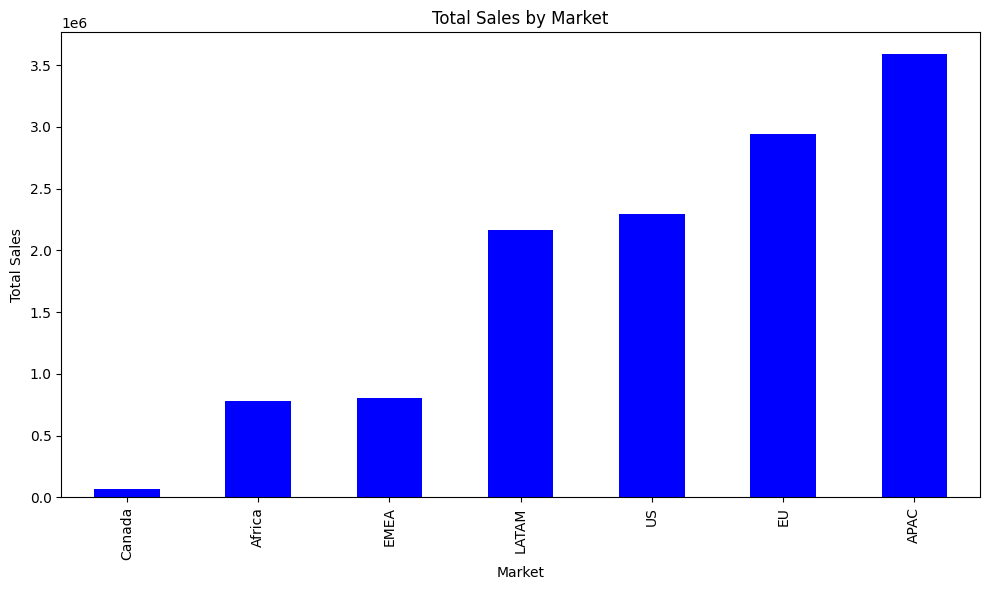

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# Aggregating sales by Market
sales_by_market = df.groupby('Market')['Sales'].sum().sort_values(ascending=True)
# Plotting
plt.figure(figsize=(10, 6))
sales_by_market.plot(kind='bar', color='blue')
plt.title('Total Sales by Market')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()

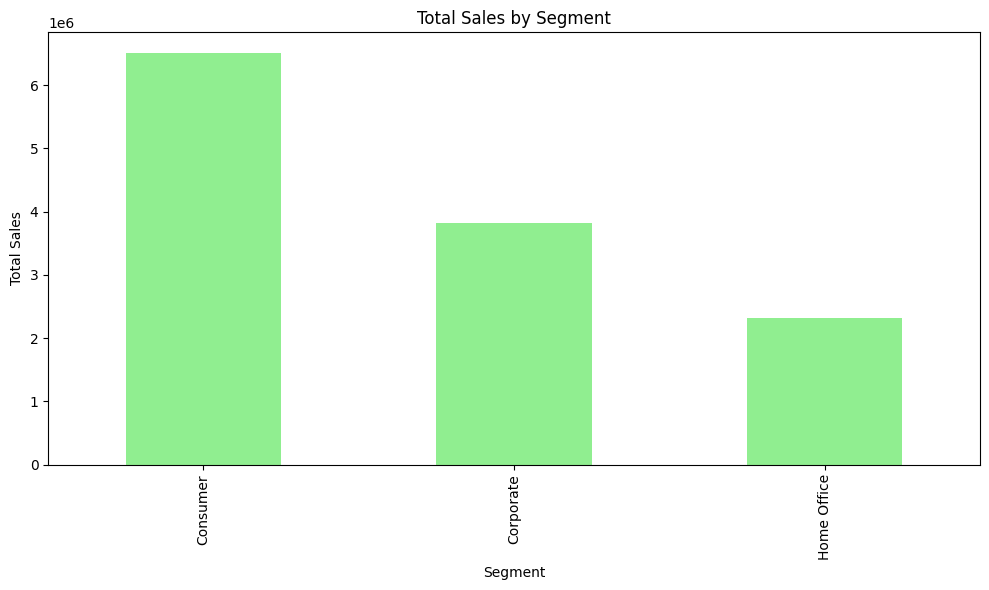

In [36]:
#grouping by 'Segment' and sum 'Sales'
sales_by_segment = df.groupby('Segment')['Sales'].sum()
#Plotting
plt.figure(figsize=(10, 6))
sales_by_segment.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()

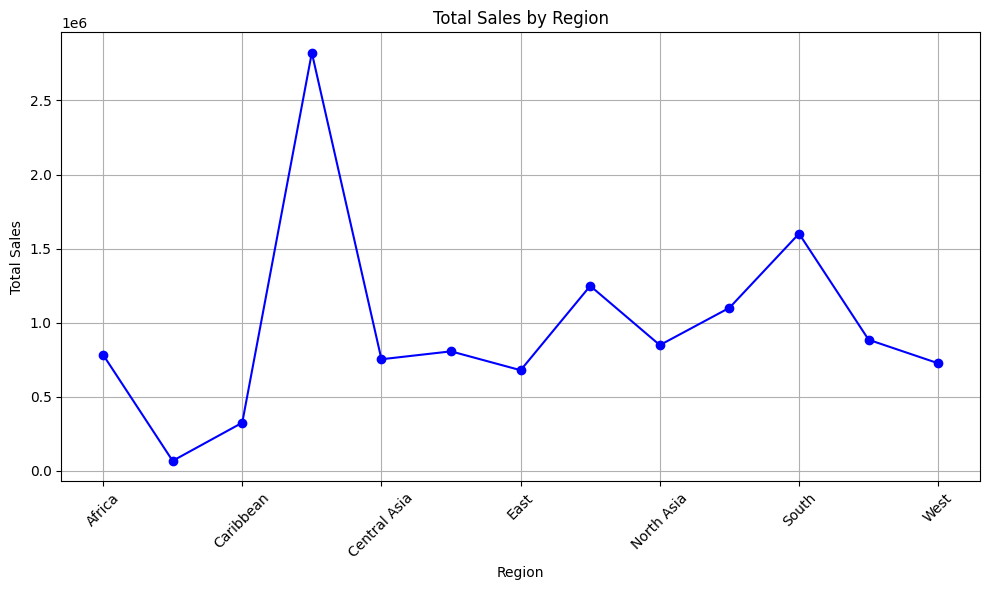

In [37]:
#group by 'Region' and sum 'Sales'
sales_by_region = df.groupby('Region')['Sales'].sum()
# Plotting
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='line', marker='o', color='blue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

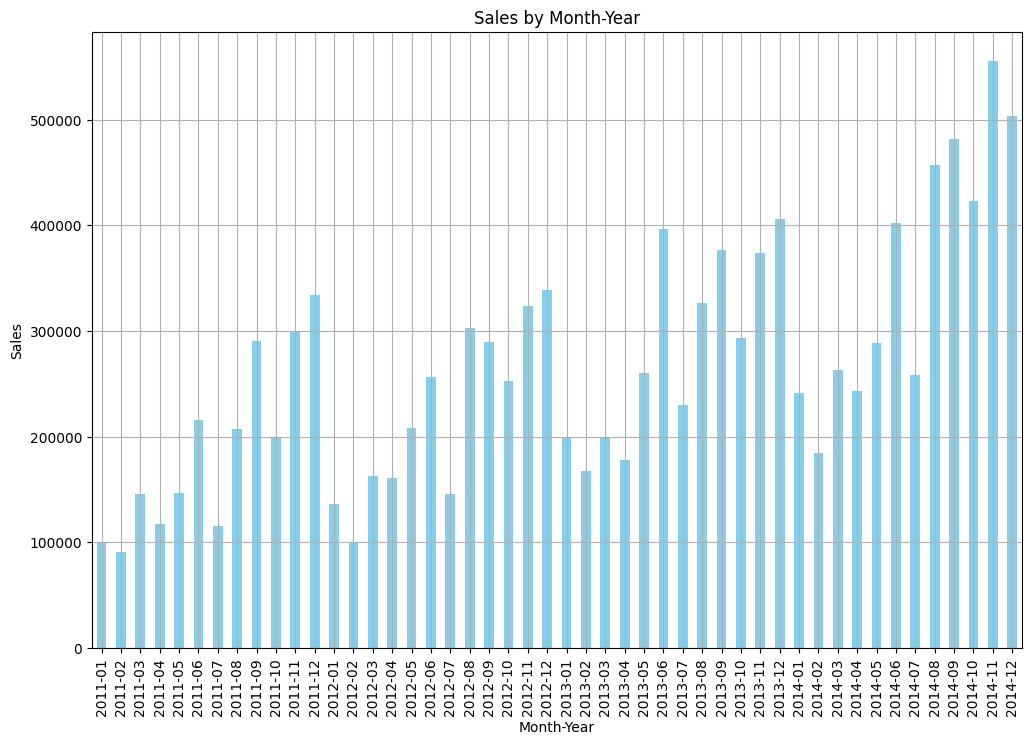

In [38]:
#Sales by Month
plt.figure(figsize=(12, 8))
monthly_sales = df.groupby('Order Year-Month')[numeric_columns].sum()['Sales']
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

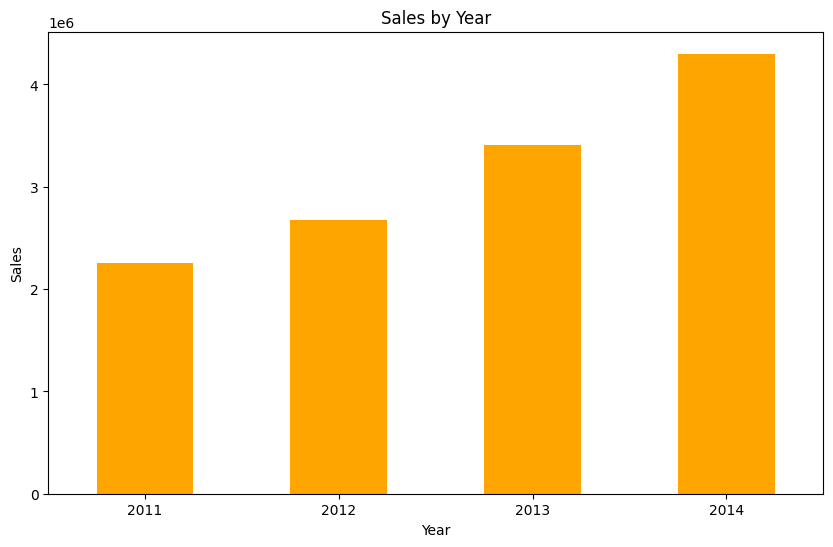

In [39]:
#Sales by Month
plt.figure(figsize=(10, 6))
year_sales = df.groupby('Order Year')[numeric_columns].sum()['Sales']
year_sales.plot(kind='bar', color='orange')
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

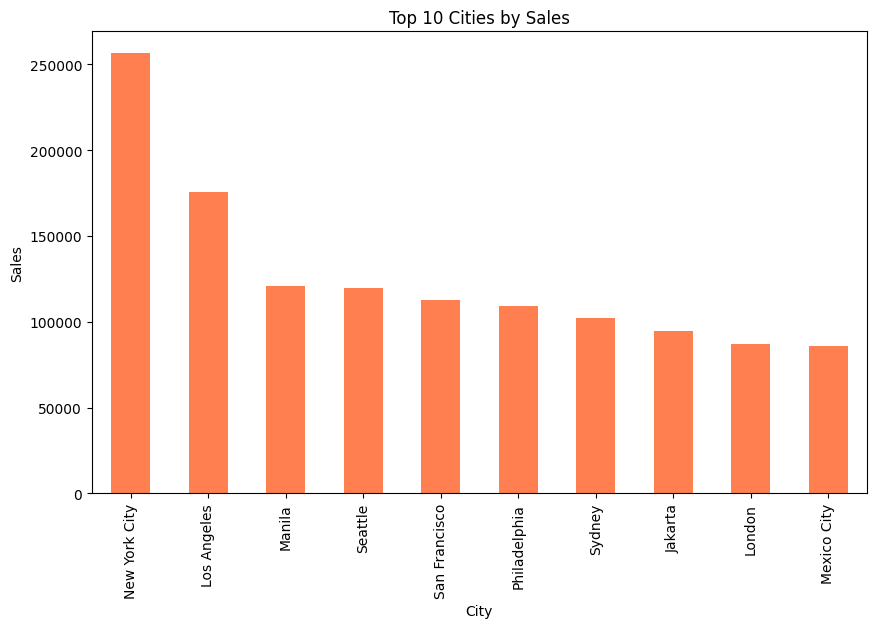

In [40]:
#Sales by City(top 10)
plt.figure(figsize=(10, 6))
city_sales = df.groupby('City')[numeric_columns].sum()['Sales'].sort_values(ascending=False).head(10)
city_sales.plot(kind='bar', color='coral')
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

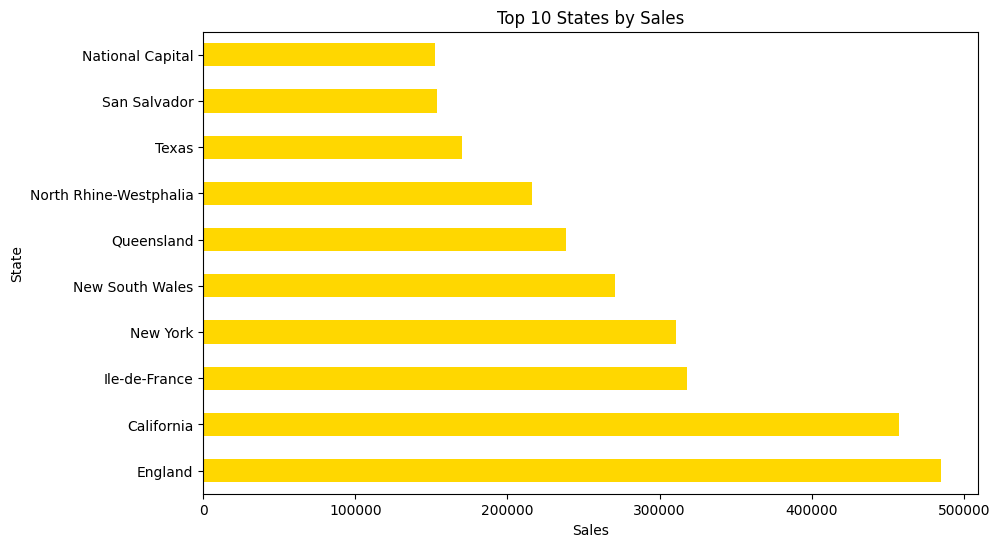

In [41]:
#Sales by State(top 10)
plt.figure(figsize=(10, 6))
state_sales = df.groupby('State')[numeric_columns].sum()['Sales'].sort_values(ascending=False).head(10)
state_sales.plot(kind='barh', color='gold')
plt.title('Top 10 States by Sales')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

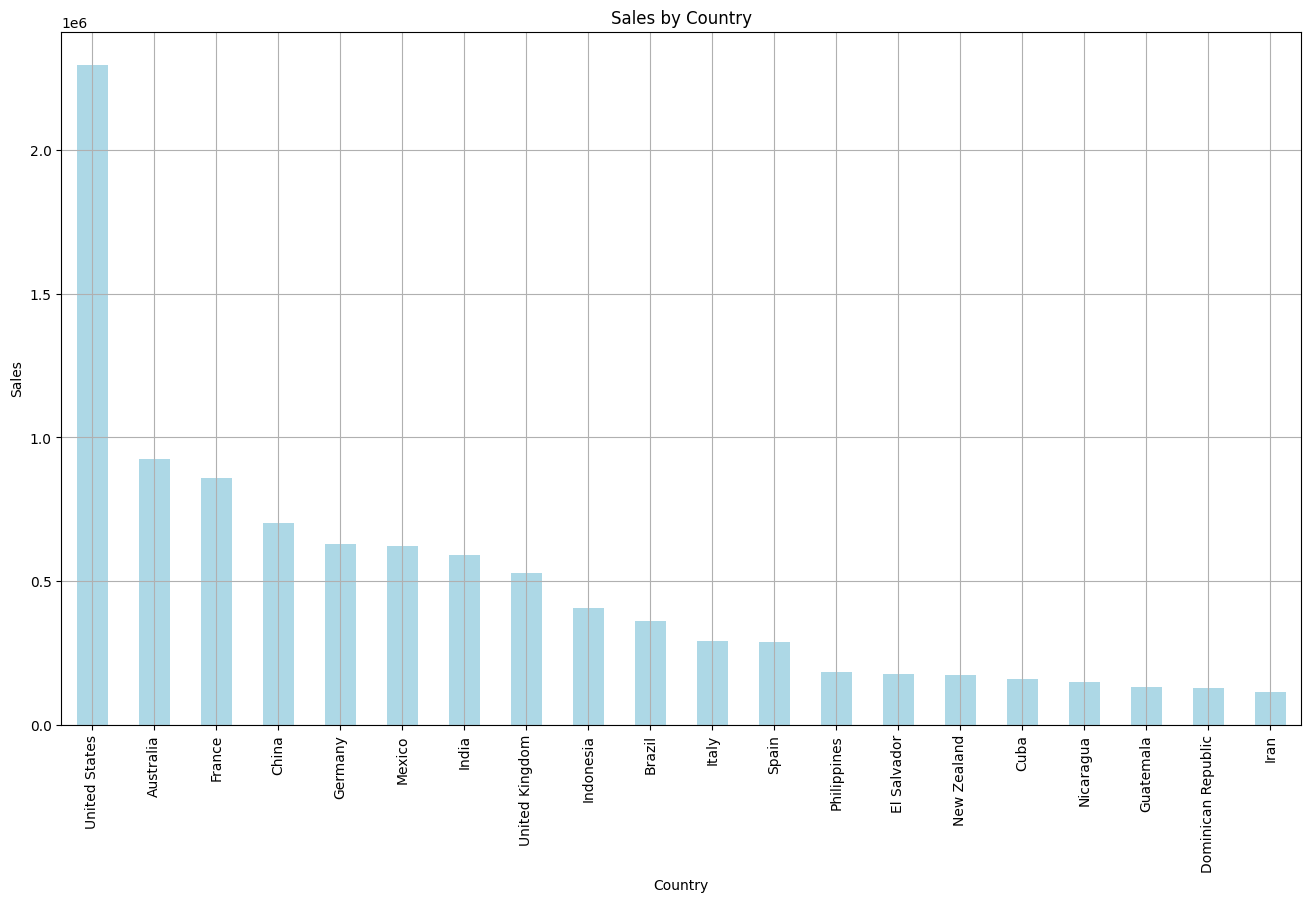

In [42]:
#Sales by Country
plt.figure(figsize=(16, 9))
country_sales = df.groupby('Country')[numeric_columns].sum()['Sales'].sort_values(ascending=False).head(20)
country_sales.plot(kind='bar', color='lightblue')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

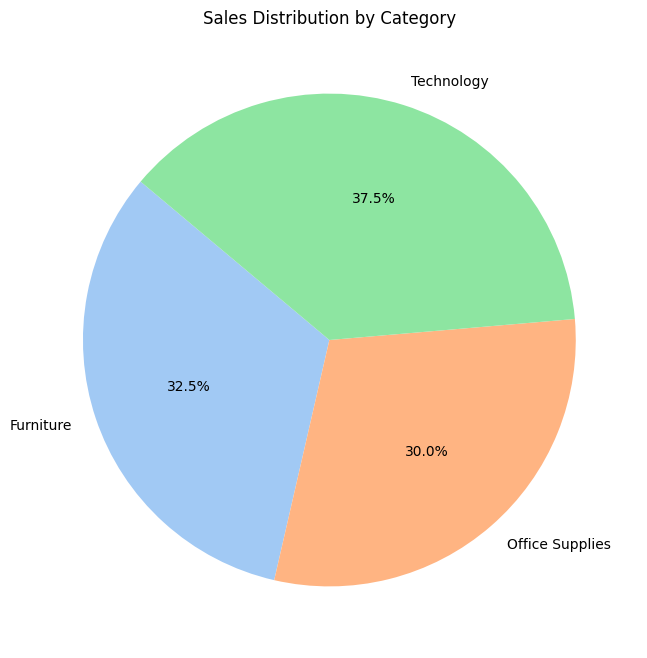

In [43]:
#Sales by Category
plt.figure(figsize=(8, 8))
category_sales = df.groupby('Category')[numeric_columns].sum()['Sales']
category_sales.plot(kind='pie',autopct='%1.1f%%',startangle=140,colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()

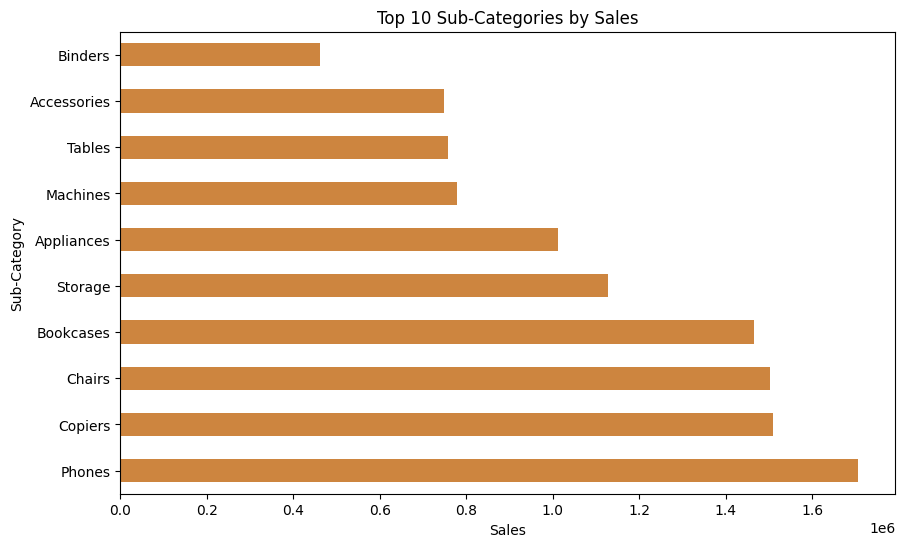

In [44]:
#Sales by Sub-Category(top 10)
plt.figure(figsize=(10, 6))
sub_category_sales = df.groupby('Sub-Category')[numeric_columns].sum()['Sales'].sort_values(ascending=False).head(10)
sub_category_sales.plot(kind='barh', color='peru')
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.show()

###Visualization of Profit Attribute

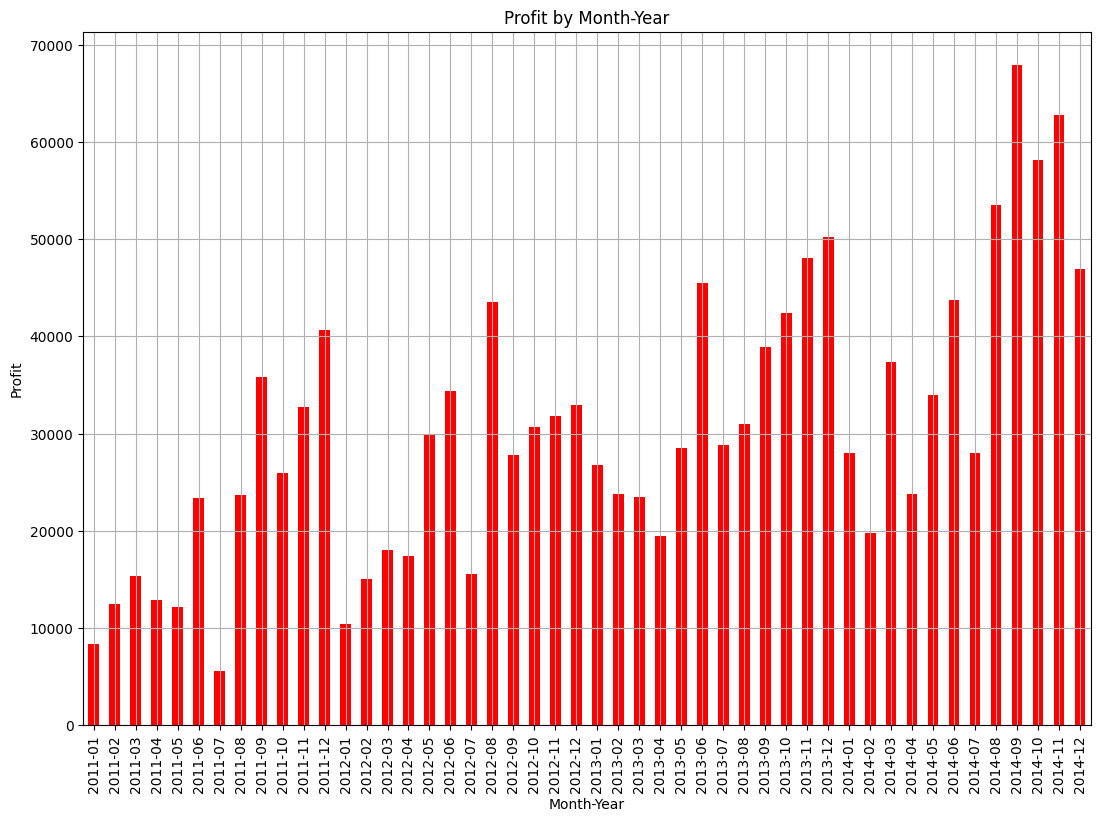

In [45]:
#Profit by Month-Year
plt.figure(figsize=(13, 9))
month_profit = df.groupby('Order Year-Month')[numeric_columns].sum()['Profit']
month_profit.plot(kind='bar', color='r')
plt.title('Profit by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

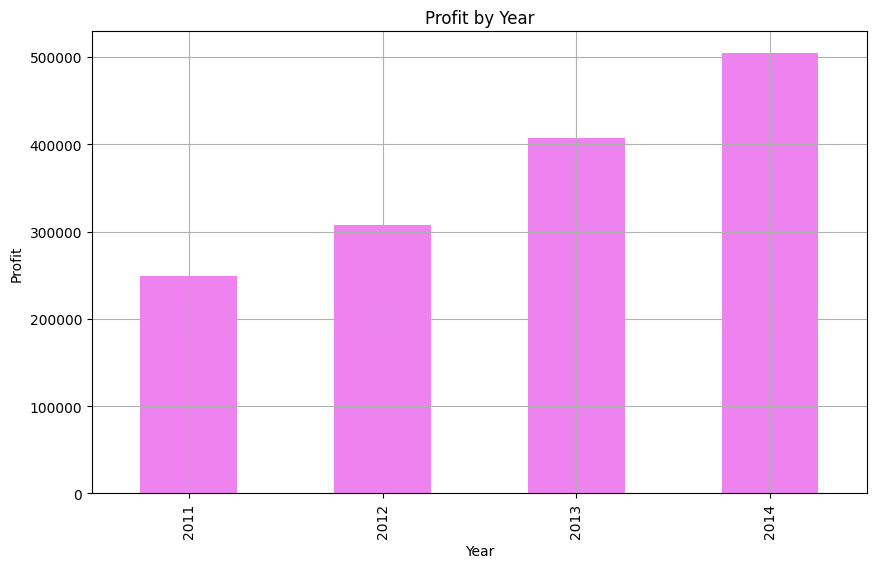

In [46]:
#Profit by Year
plt.figure(figsize=(10, 6))
yearly_profit = df.groupby('Order Year')[numeric_columns].sum()['Profit']
yearly_profit.plot(kind='bar', color='violet')
plt.title('Profit by Year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

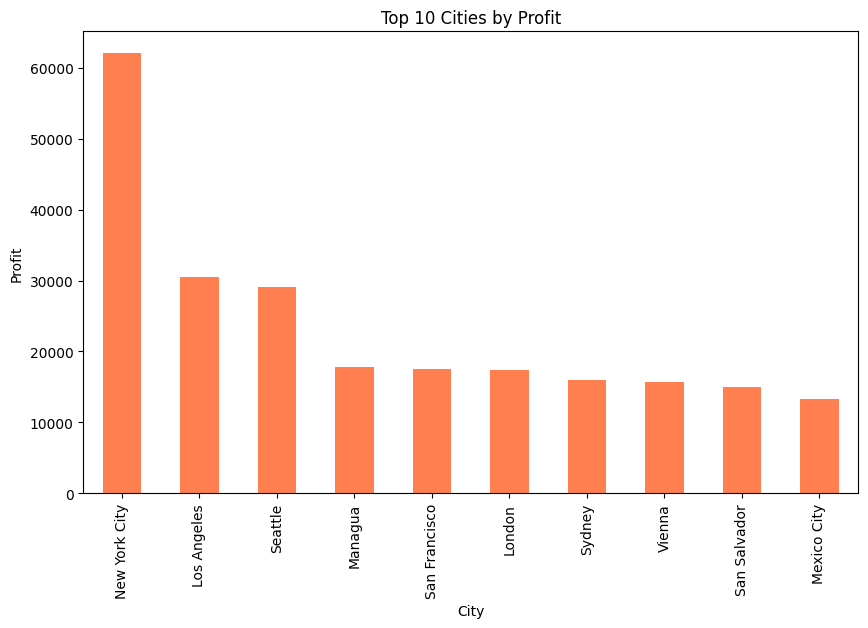

In [47]:
#Profit by City(top 10)
plt.figure(figsize=(10, 6))
city_profit = df.groupby('City')[numeric_columns].sum()['Profit'].sort_values(ascending=False).head(10)
city_profit.plot(kind='bar', color='coral')
plt.title('Top 10 Cities by Profit')
plt.xlabel('City')
plt.ylabel('Profit')
plt.show()

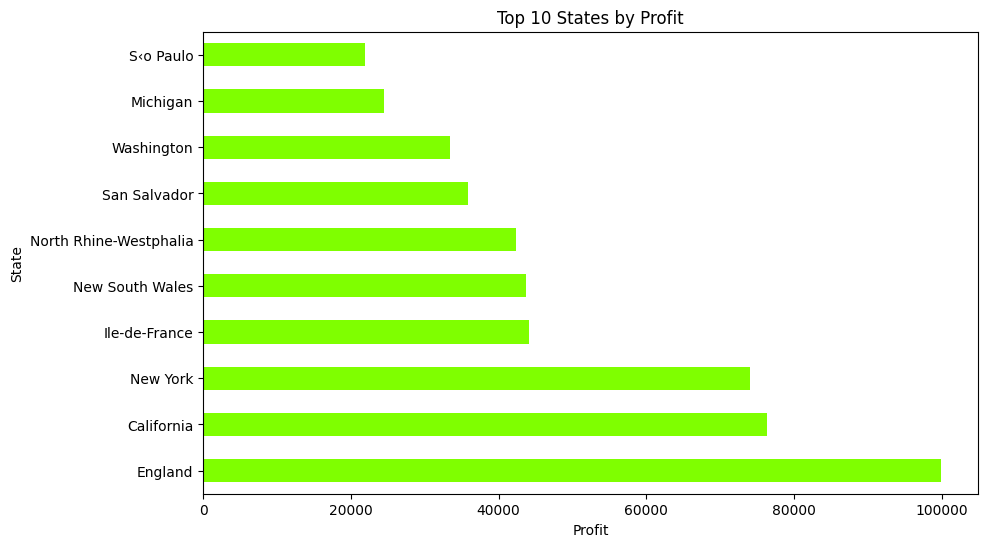

In [48]:
#Profit by State(top 10)
plt.figure(figsize=(10, 6))
state = df.groupby('State')[numeric_columns].sum()['Profit'].sort_values(ascending=False).head(10)
state.plot(kind='barh', color='chartreuse')
plt.title('Top 10 States by Profit')
plt.xlabel('Profit')
plt.ylabel('State')
plt.show()

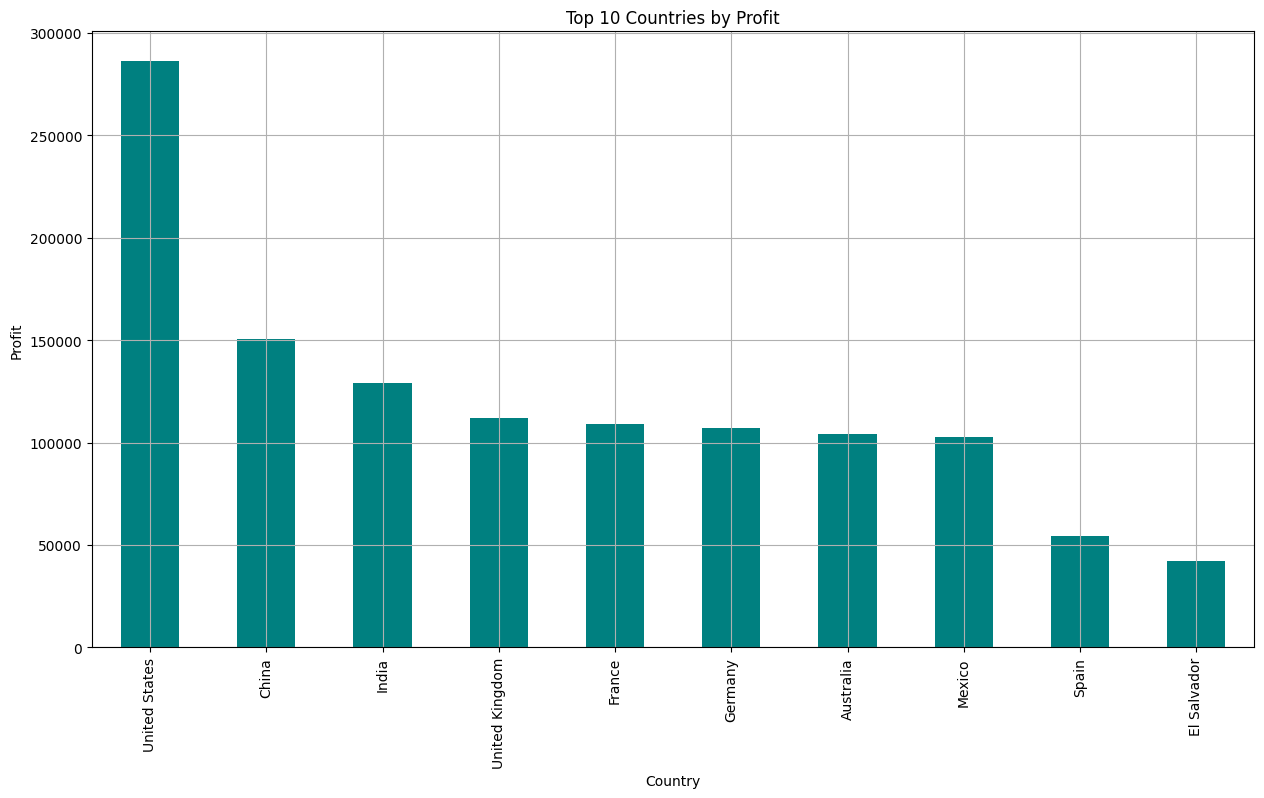

In [49]:
#Profit by Country(top 10)
plt.figure(figsize=(15, 8))
country_profit = df.groupby('Country')[numeric_columns].sum()['Profit'].sort_values(ascending=False).head(10)
country_profit.plot(kind='bar', color='teal')
plt.title('Top 10 Countries by Profit')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

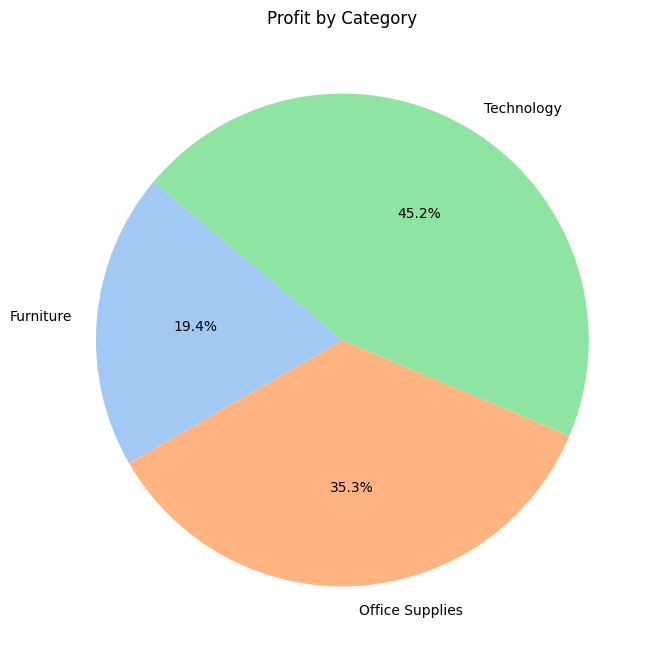

In [50]:
#Profit by Category
plt.figure(figsize=(8, 8))
category_profit = df.groupby('Category')[numeric_columns].sum()['Profit']
category_profit.plot(kind='pie',autopct='%1.1f%%',startangle=140,colors=sns.color_palette('pastel'))
plt.title('Profit by Category')
plt.ylabel('')
plt.show()

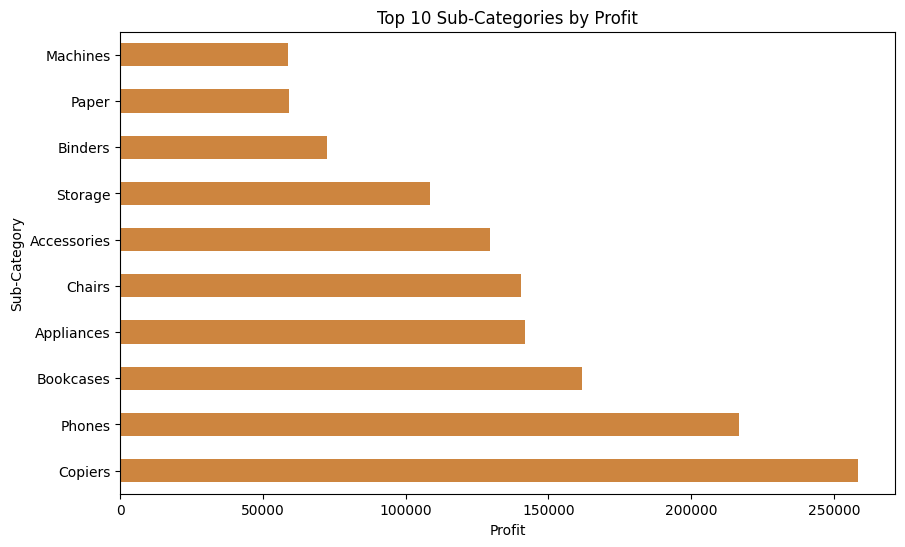

In [51]:
#Profit by Sub-Category(top 10)
plt.figure(figsize=(10, 6))
sub_category = df.groupby('Sub-Category')[numeric_columns].sum()['Profit'].sort_values(ascending=False).head(10)
sub_category.plot(kind='barh', color='peru')
plt.title('Top 10 Sub-Categories by Profit')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.show()

##Comparison of sales, discount, profit, shipping cost

### Sales vs. profit

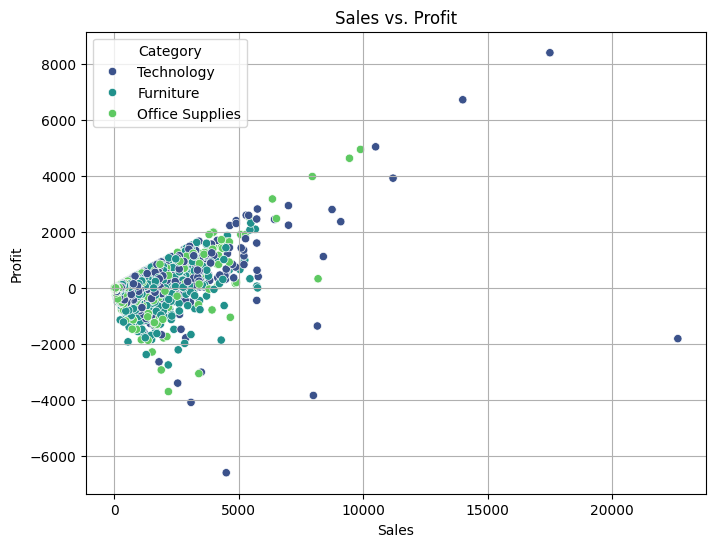

In [52]:
#Sales vs. Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', palette='viridis')
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

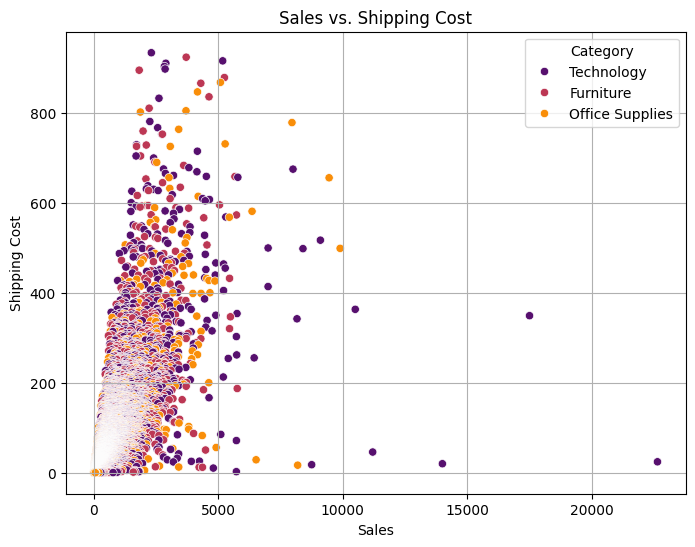

In [53]:
#Sales vs. Shipping Cost
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sales',y='Shipping Cost',hue='Category',palette='inferno')
plt.title('Sales vs. Shipping Cost')
plt.xlabel('Sales')
plt.ylabel('Shipping Cost')
plt.grid(True)
plt.show()

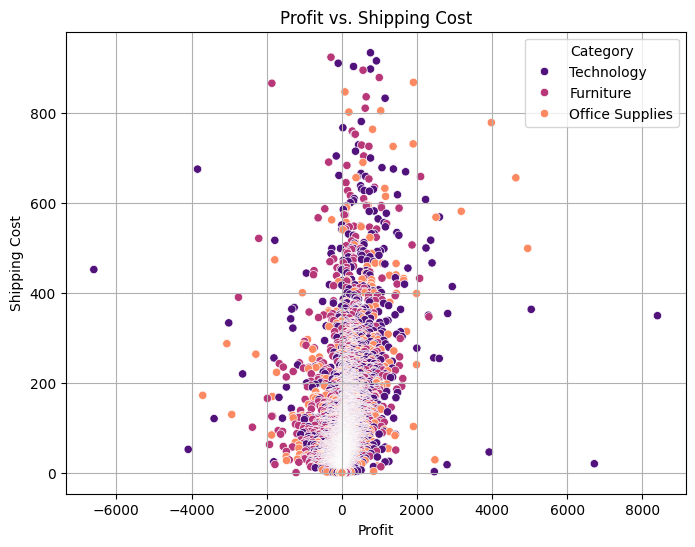

In [54]:
#Profit vs. Shipping Cost
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Profit',y='Shipping Cost',hue='Category',palette='magma')
plt.title('Profit vs. Shipping Cost')
plt.xlabel('Profit')
plt.ylabel('Shipping Cost')
plt.grid(True)
plt.show()

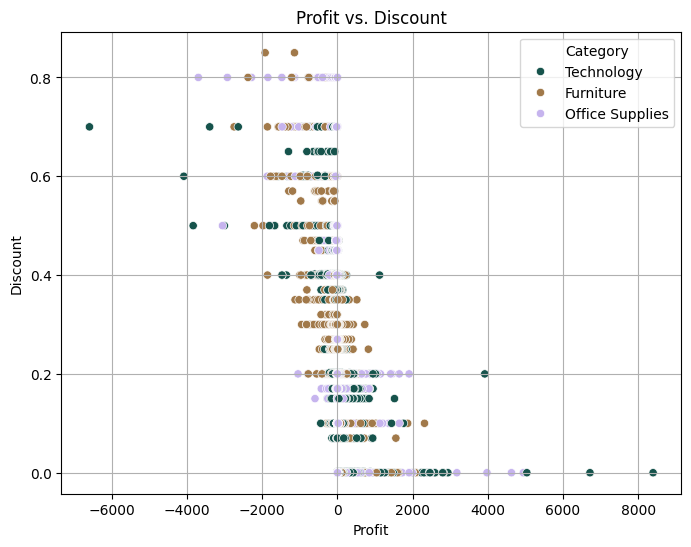

In [55]:
#Profit vs. Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Profit', y='Discount', hue='Category', palette='cubehelix')
plt.title('Profit vs. Discount')
plt.xlabel('Profit')
plt.ylabel('Discount')
plt.grid(True)
plt.show()

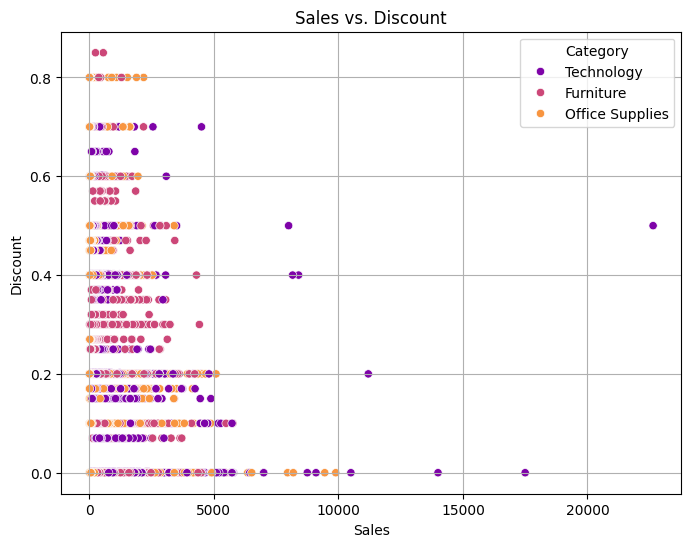

In [56]:
#Sales vs. Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sales', y='Discount', hue='Category', palette='plasma')
plt.title('Sales vs. Discount')
plt.xlabel('Sales')
plt.ylabel('Discount')
plt.grid(True)
plt.show()

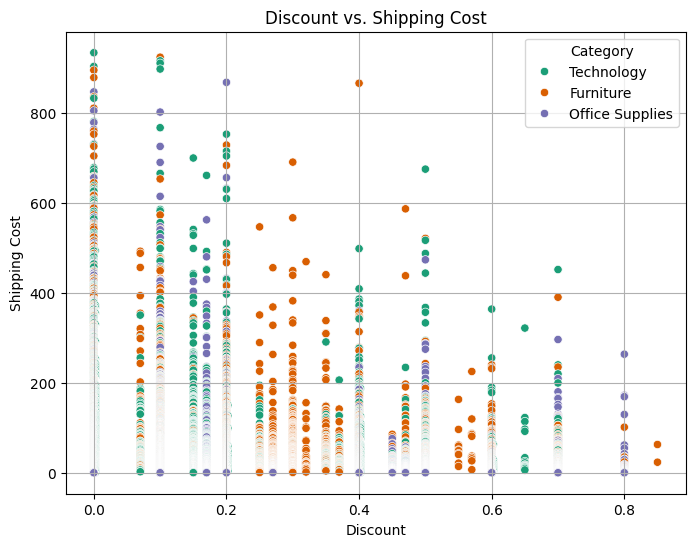

In [57]:
#Discount vs. Shipping Cost
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df,x='Discount',y='Shipping Cost',hue='Category',palette='Dark2')
plt.title('Discount vs. Shipping Cost')
plt.xlabel('Discount')
plt.ylabel('Shipping Cost')
plt.grid(True)
plt.show()

###Pair Plots

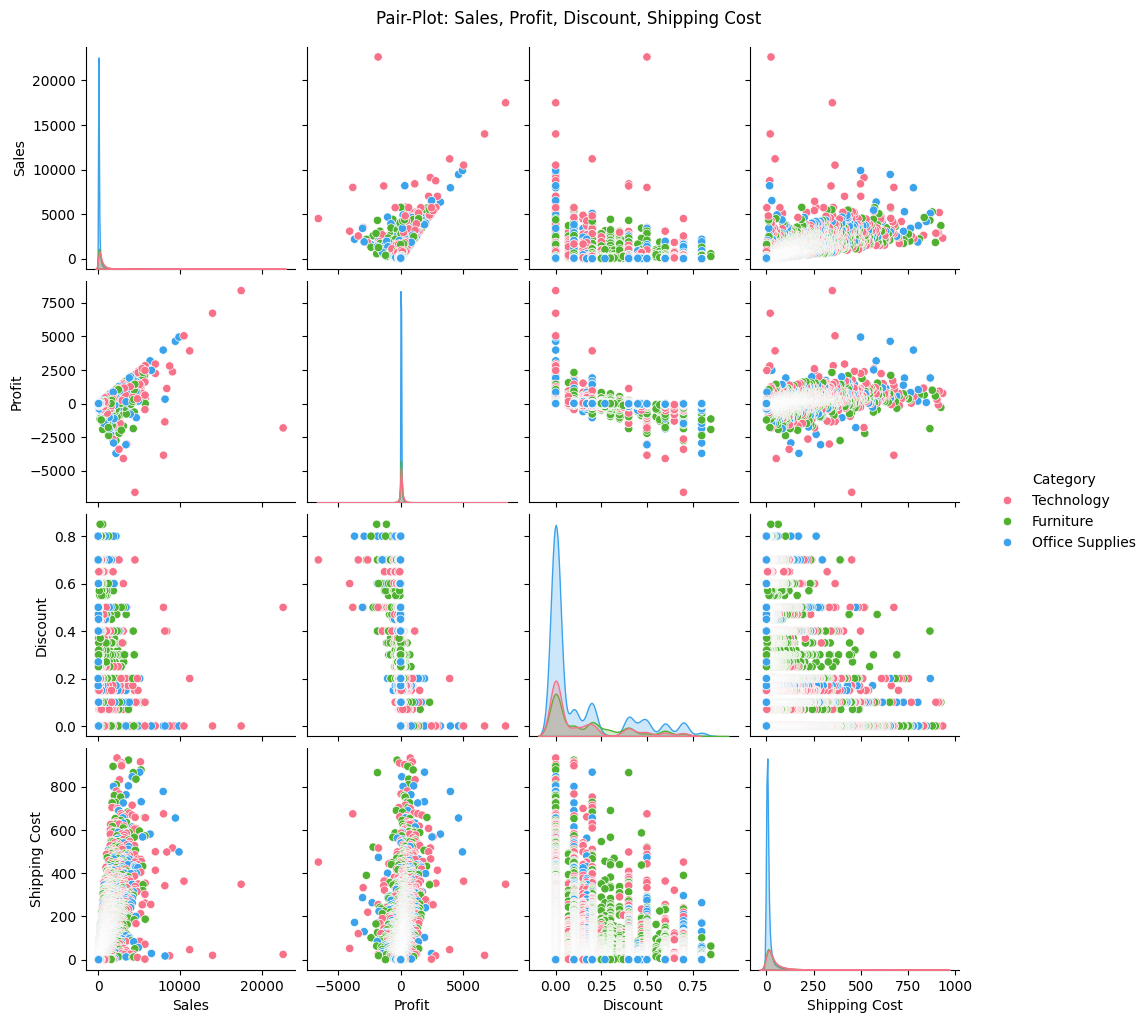

In [58]:
#Pair Plot for Sales, Profit, Discount, and Shipping Cost
sns.pairplot(df, vars=['Sales','Profit','Discount','Shipping Cost'],hue='Category',palette='husl')
plt.suptitle('Pair-Plot: Sales, Profit, Discount, Shipping Cost',y=1.02)
plt.show()

###Ship Modes vs. Order Priority

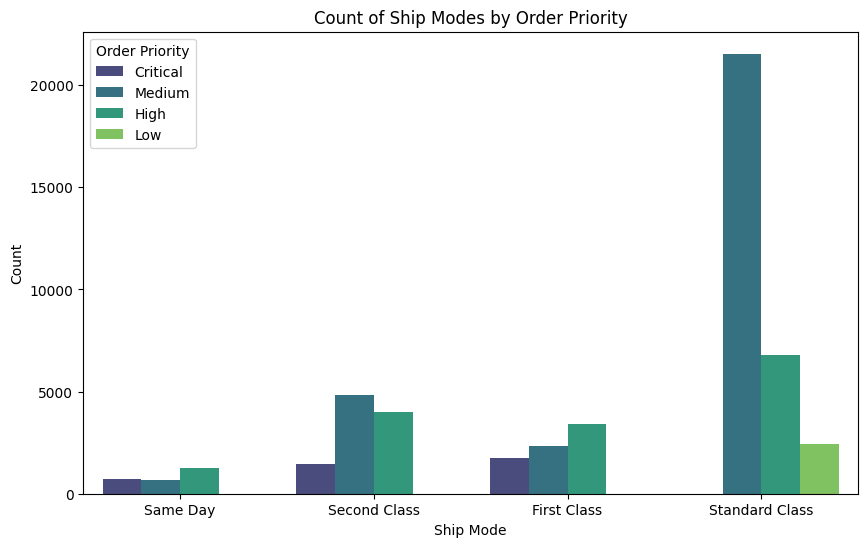

In [59]:
#Plotting the relationship between Order Priority and Ship Mode
plt.figure(figsize=(10, 6))
sns.countplot(x='Ship Mode',hue='Order Priority',data=df,palette='viridis')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.title('Count of Ship Modes by Order Priority')
plt.legend(title='Order Priority')
plt.show()

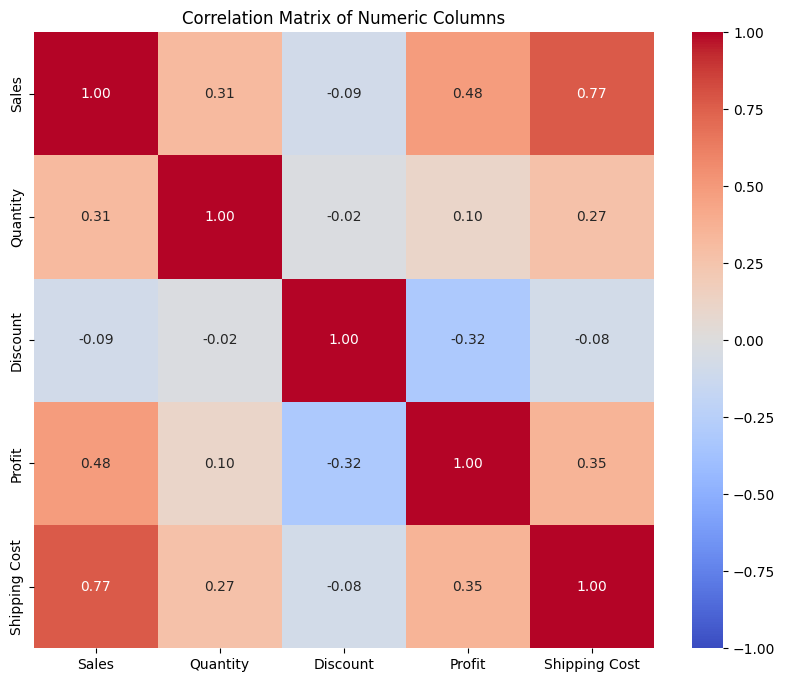

In [60]:
#Calculating the correlation matrix for numerical matrix
corr_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']].corr()
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

As per above heat map the highest correlation are:

Sales and Shipping Cost - (0.77)

Sales and Profit - (0.48)

Profit and Shipping Cost - (0.35)

#Trend Analysis

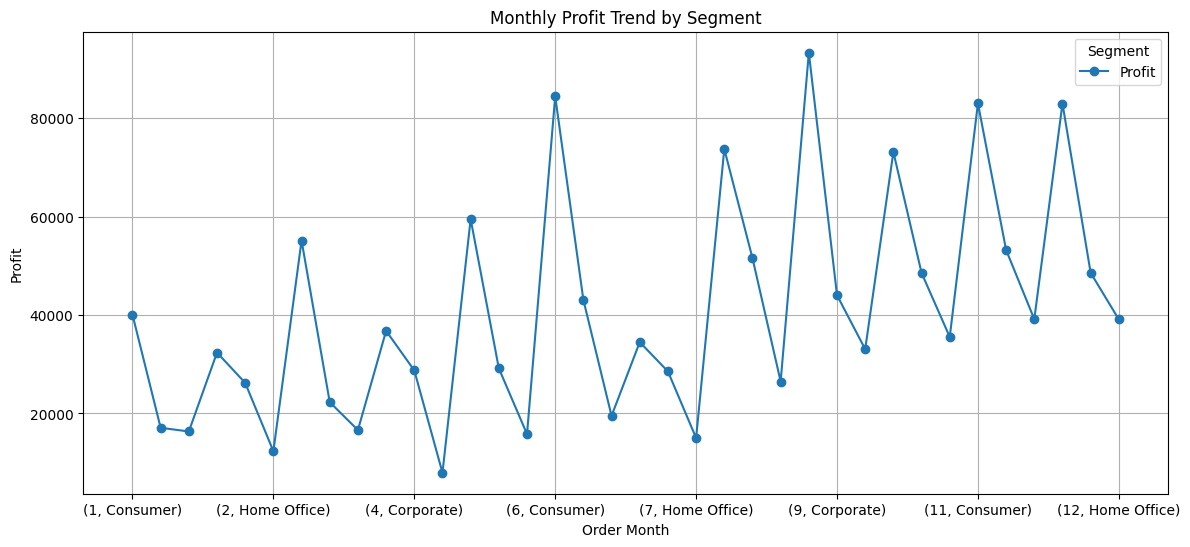

In [61]:
segment_profit = df.groupby(['Order Month', 'Segment'])['Profit'].sum()
#Plotting Profit Trend by Segment
plt.figure(figsize=(14, 6))
segment_profit.plot(kind='line', marker='o')
plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Monthly Profit Trend by Segment')
plt.grid(True)
plt.legend(title='Segment')
plt.show()

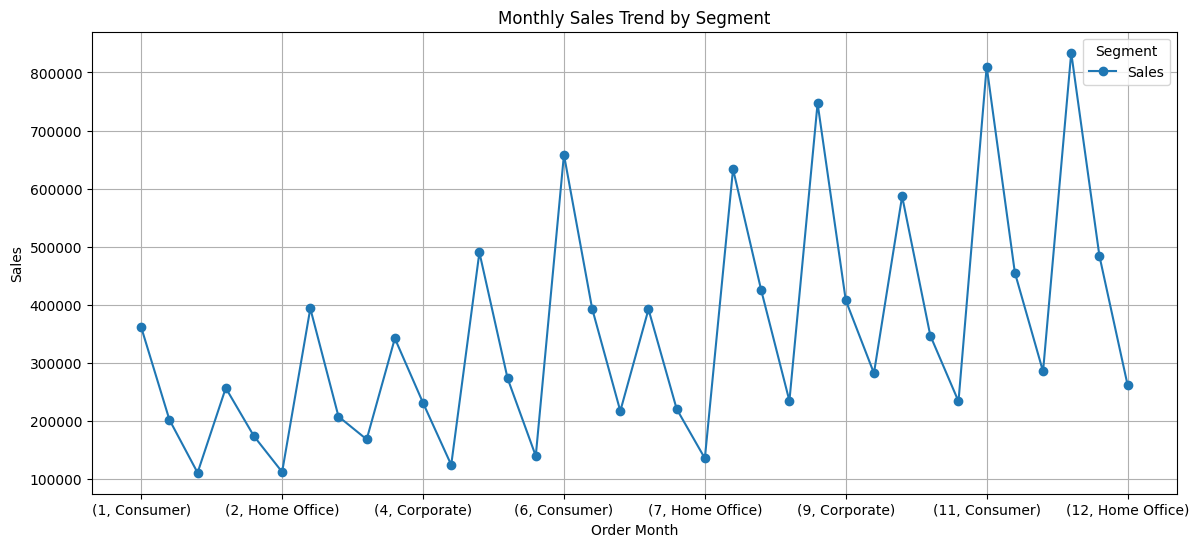

In [62]:
segment_profit = df.groupby(['Order Month', 'Segment'])['Sales'].sum()
#Plotting Profit Trend by Segment
plt.figure(figsize=(14, 6))
segment_profit.plot(kind='line', marker='o')
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend by Segment')
plt.grid(True)
plt.legend(title='Segment')
plt.show()

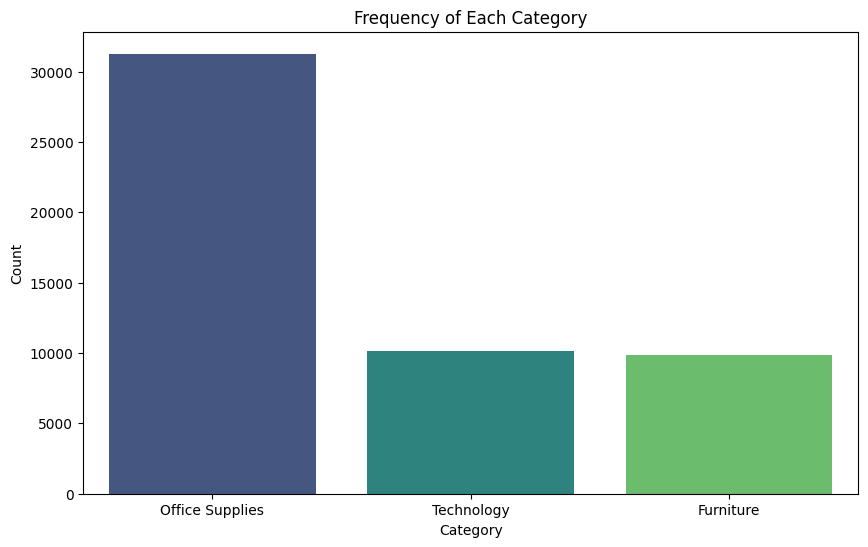

In [63]:
#frequency table for category
frequency = df['Category'].value_counts()
#Plotting the frequency table
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency.index,y=frequency.values,hue=frequency.index,palette='viridis',dodge=False)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of Each Category')
plt.show()

#Shipping Time Analysis

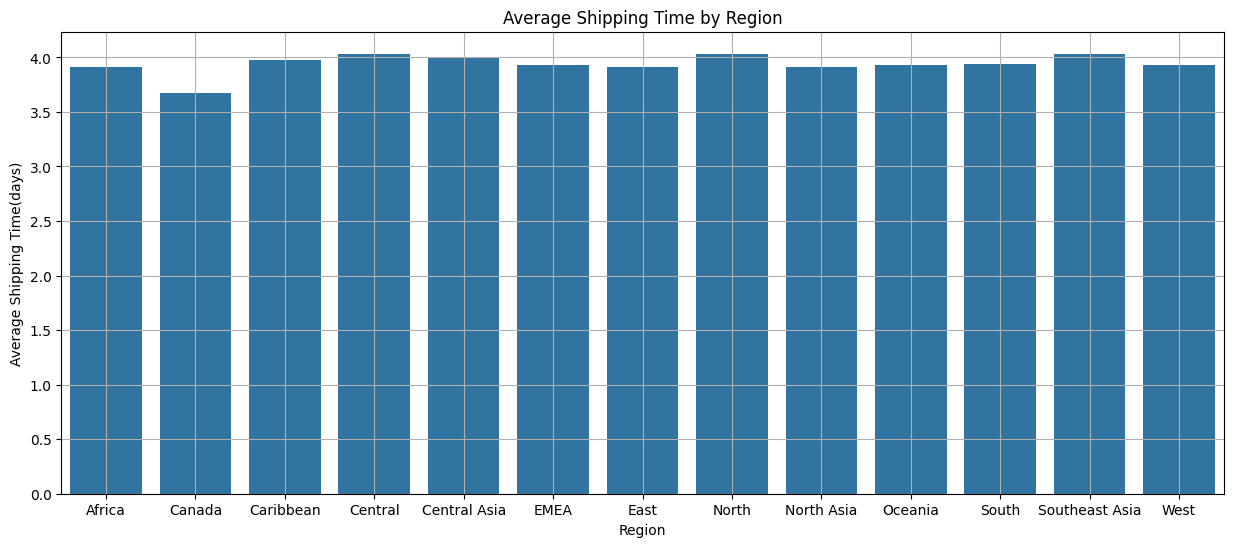

In [64]:
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days
#Calculating the average shipping time by region
Average_shipping = df.groupby('Region')['Shipping Time'].mean().reset_index()
# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x='Region', y='Shipping Time', data=Average_shipping)
plt.xlabel('Region')
plt.ylabel('Average Shipping Time(days)')
plt.title('Average Shipping Time by Region')
plt.grid(True)
plt.show()

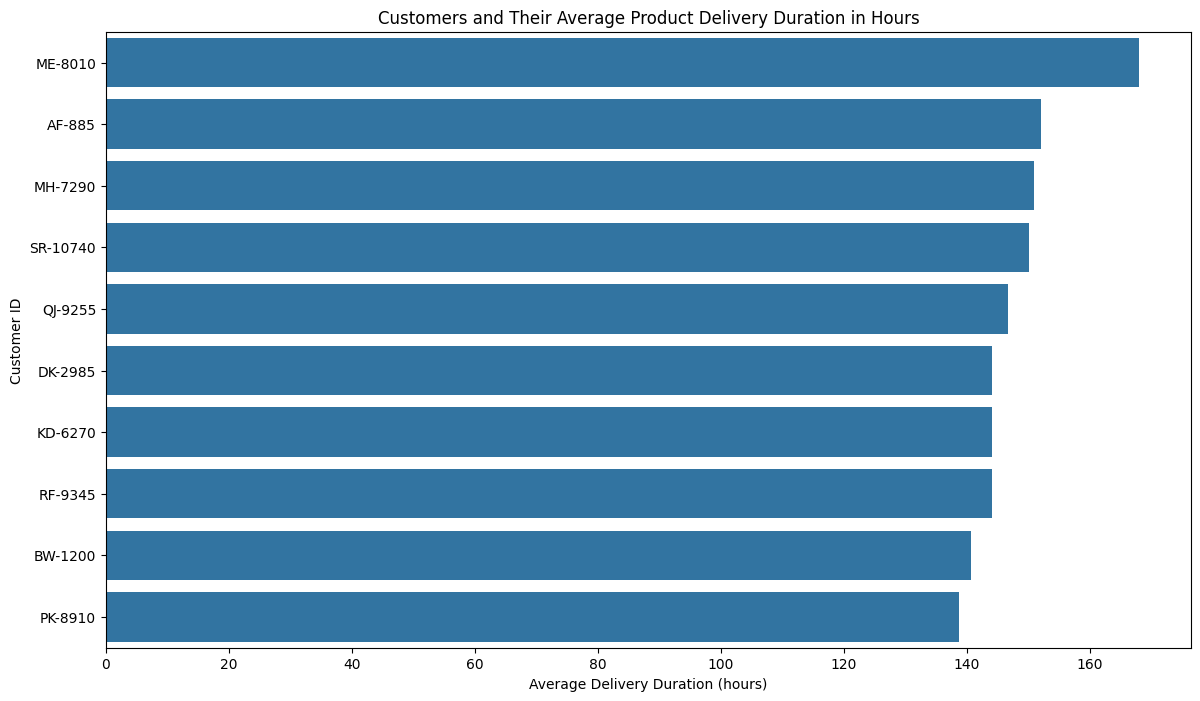

In [65]:
#Calculating delivery duration in hours
df['Delivery Duration'] = (df['Ship Date'] - df['Order Date']).dt.total_seconds() / 3600
#Average delivery duration per customer
avg_delivery_duration = df.groupby('Customer ID')['Delivery Duration'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_delivery_duration.values, y=avg_delivery_duration.index)
plt.xlabel('Average Delivery Duration (hours)')
plt.ylabel('Customer ID')
plt.title('Customers and Their Average Product Delivery Duration in Hours')
plt.show()

##Customer Distribution Over Countries

<ipython-input-66-f57594ba0a3b>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


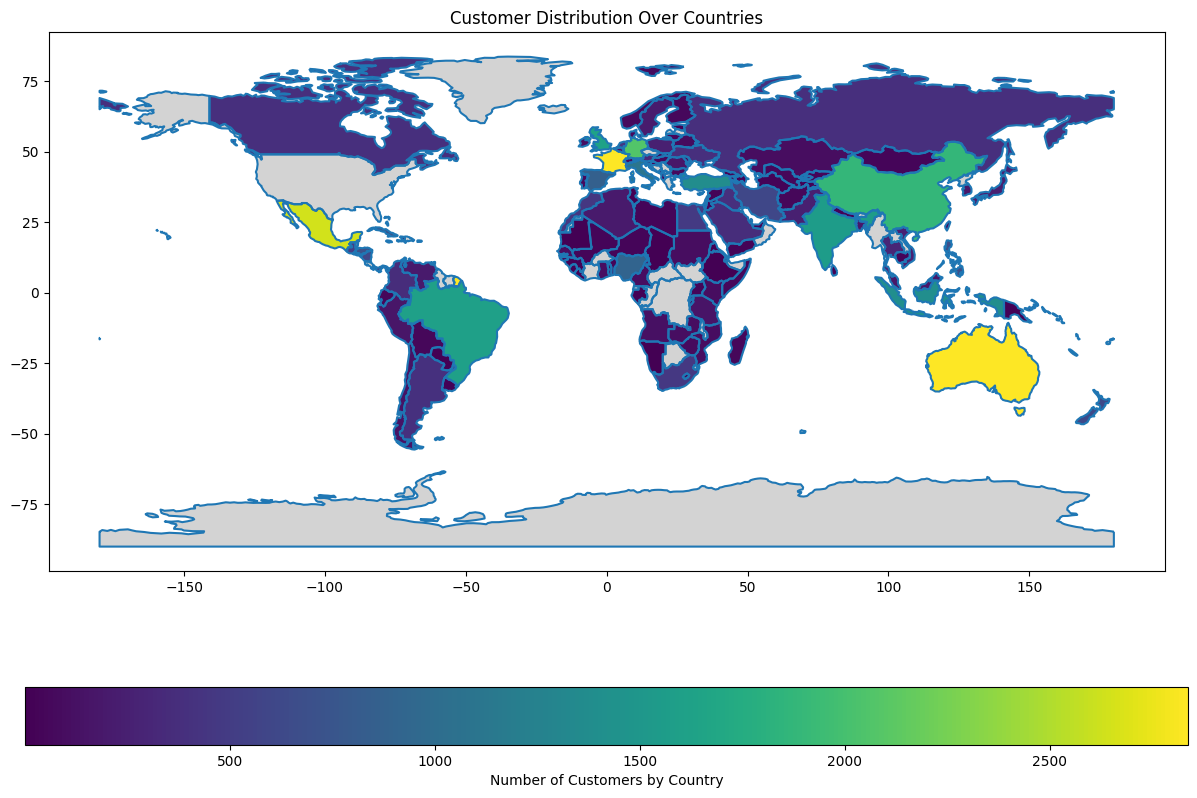

In [66]:
import geopandas as gpd
#Loading world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Aggregating customer count by country
customer_count = df.groupby('Country')['Customer ID'].count().reset_index()
customer_count.rename(columns={'Customer ID': 'Customers'}, inplace=True)

#Merging customer data with world map data
world = world.merge(customer_count, how='left', left_on='name', right_on='Country')

#Plotting the world map with customer distribution
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Customers', ax=ax, legend=True,
           legend_kwds={'label': "Number of Customers by Country",'orientation': "horizontal"},
           cmap='viridis', missing_kwds={"color": "lightgrey"})
plt.title('Customer Distribution Over Countries')
plt.show()

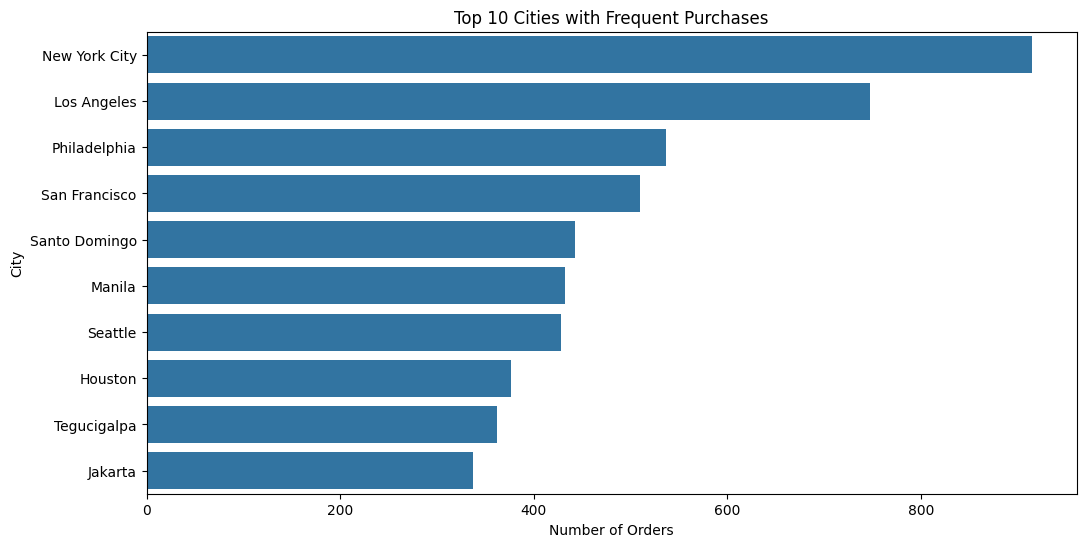

In [67]:
#Top 10 Cities with Frequent Purchases
top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.xlabel('Number of Orders')
plt.ylabel('City')
plt.title('Top 10 Cities with Frequent Purchases')
plt.show()

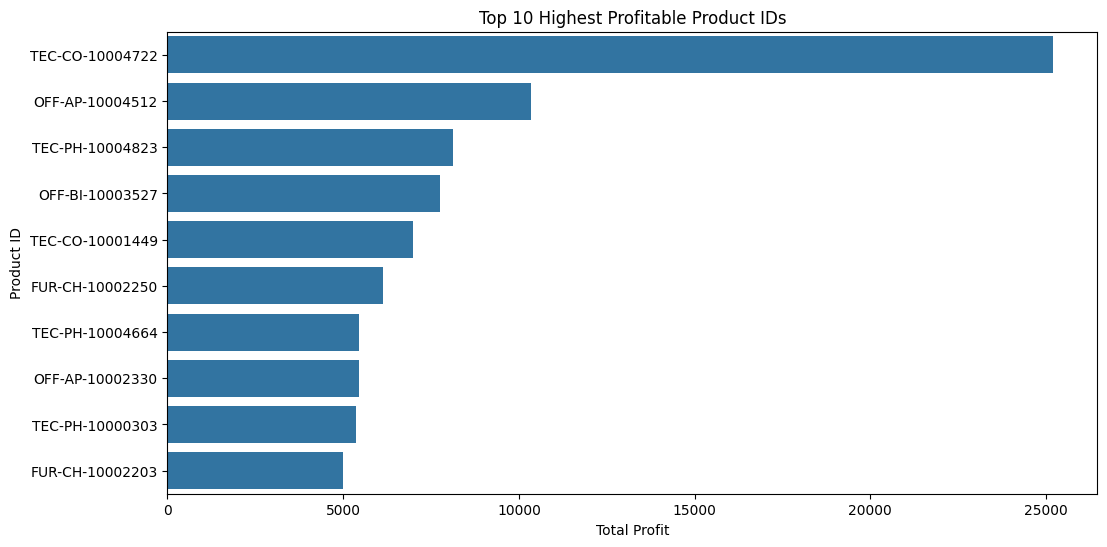

In [68]:
#Top 10 Highest Profitable Product IDs
top_profitable = df.groupby('Product ID')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_profitable.values, y=top_profitable.index)
plt.xlabel('Total Profit')
plt.ylabel('Product ID')
plt.title('Top 10 Highest Profitable Product IDs')
plt.show()

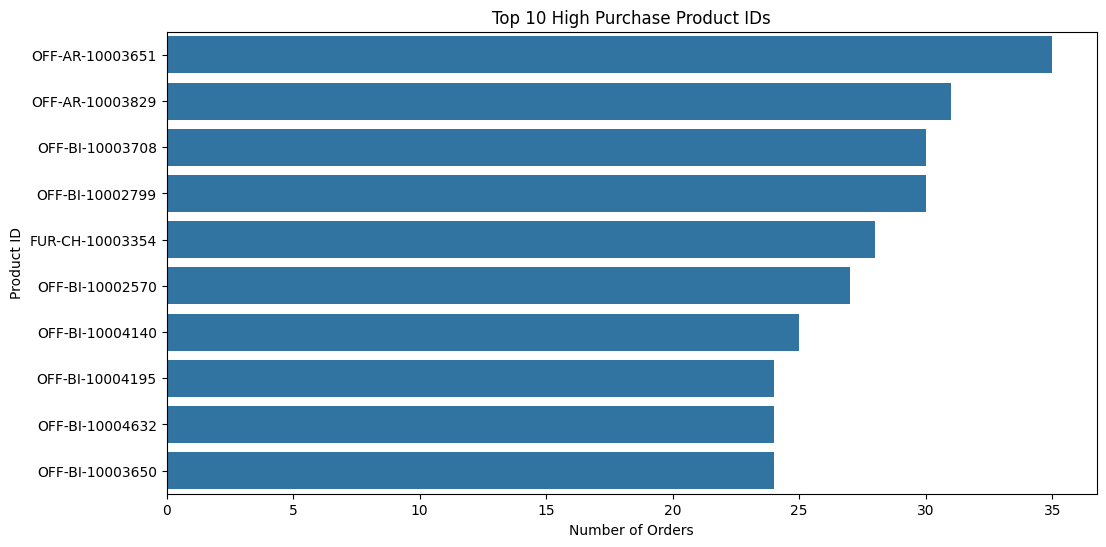

In [69]:
#Top 10 High Purchase Product IDs
top_purchased = df['Product ID'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_purchased.values, y=top_purchased.index)
plt.xlabel('Number of Orders')
plt.ylabel('Product ID')
plt.title('Top 10 High Purchase Product IDs')
plt.show()

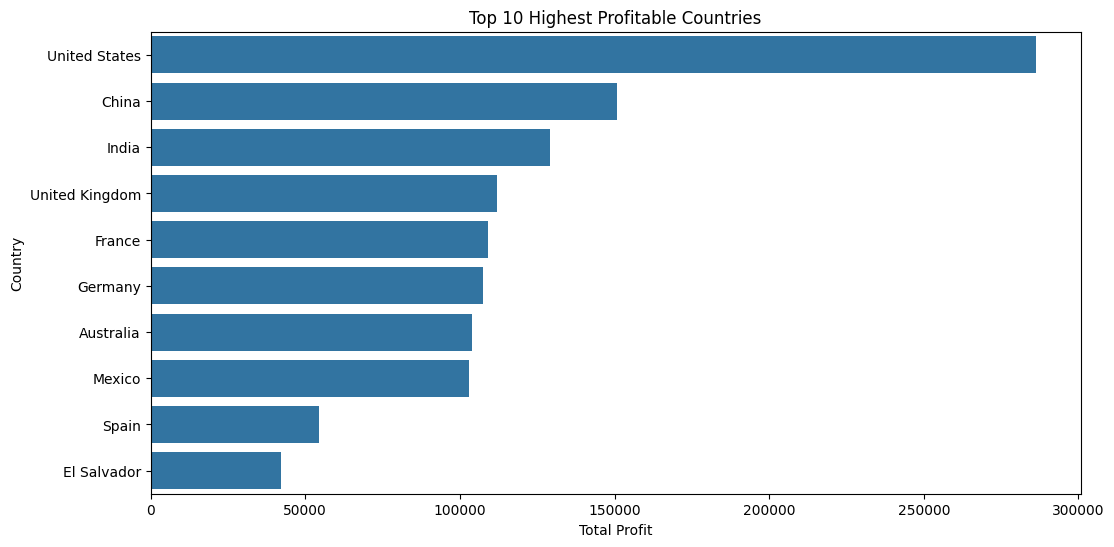

In [70]:
#Top 10 Highest Profitable Countries
top_profitable_country = df.groupby('Country')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_profitable_country.values, y=top_profitable_country.index)
plt.xlabel('Total Profit')
plt.ylabel('Country')
plt.title('Top 10 Highest Profitable Countries')
plt.show()

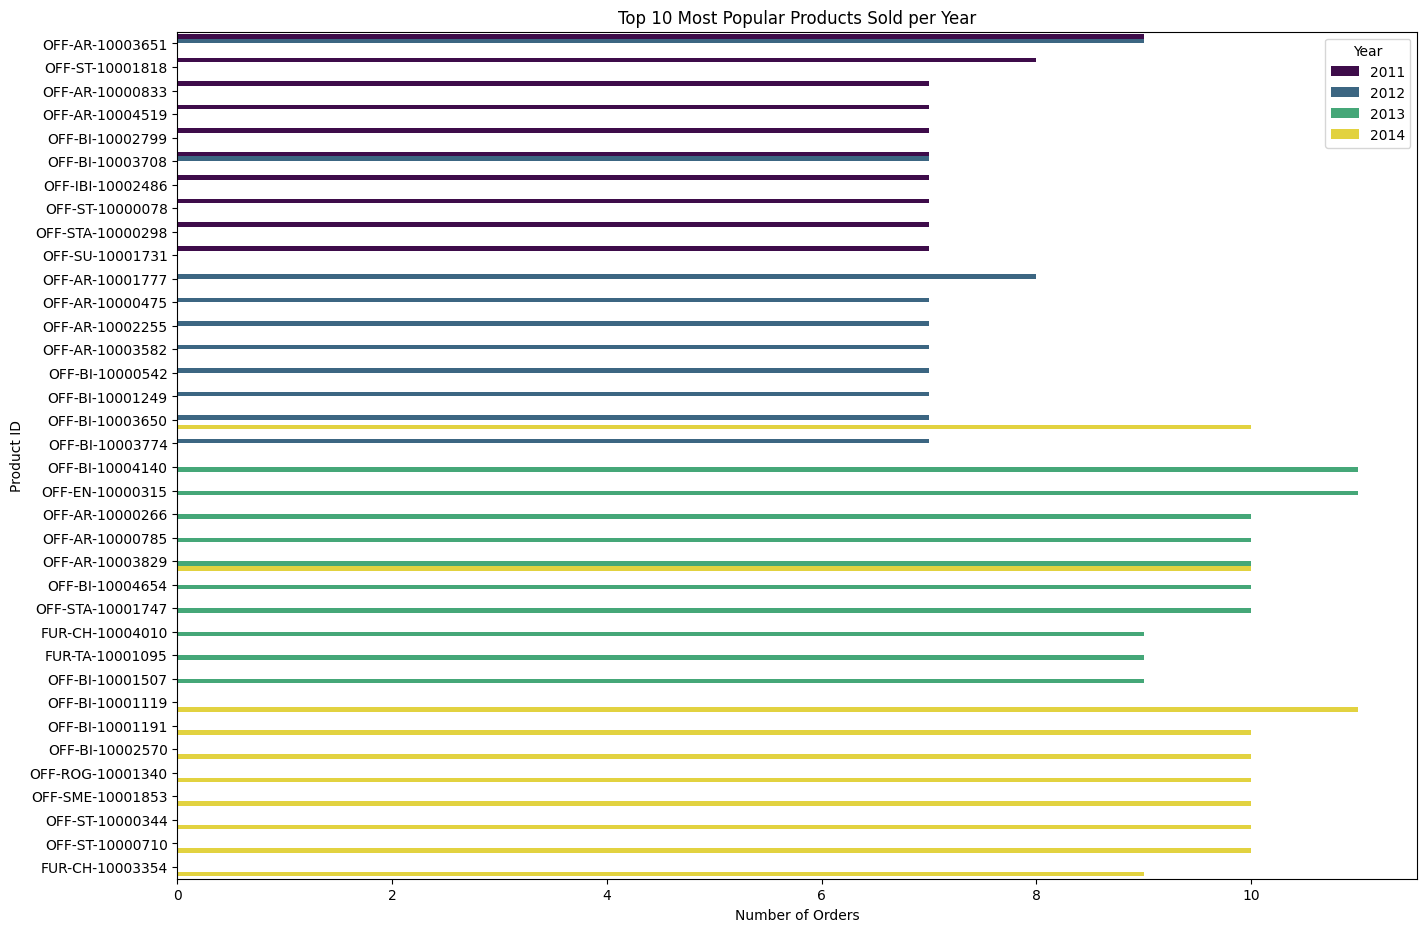

In [71]:
#Grouping by year and product to count the number of orders
product_count = df.groupby(['Order Year', 'Product ID']).size().reset_index(name='Counts')

#Finding the top 10 most popular products for each year
Top_product_per_year = product_count.groupby('Order Year').apply(lambda x: x.nlargest(10,'Counts')).reset_index(drop=True)

#plotting
plt.figure(figsize=(16, 11))
sns.barplot(data=Top_product_per_year, y='Product ID', x='Counts', hue='Order Year', palette='viridis')
plt.xlabel('Number of Orders')
plt.ylabel('Product ID')
plt.title('Top 10 Most Popular Products Sold per Year')
plt.legend(title='Year')
plt.show()

#Overall Trend Analysis

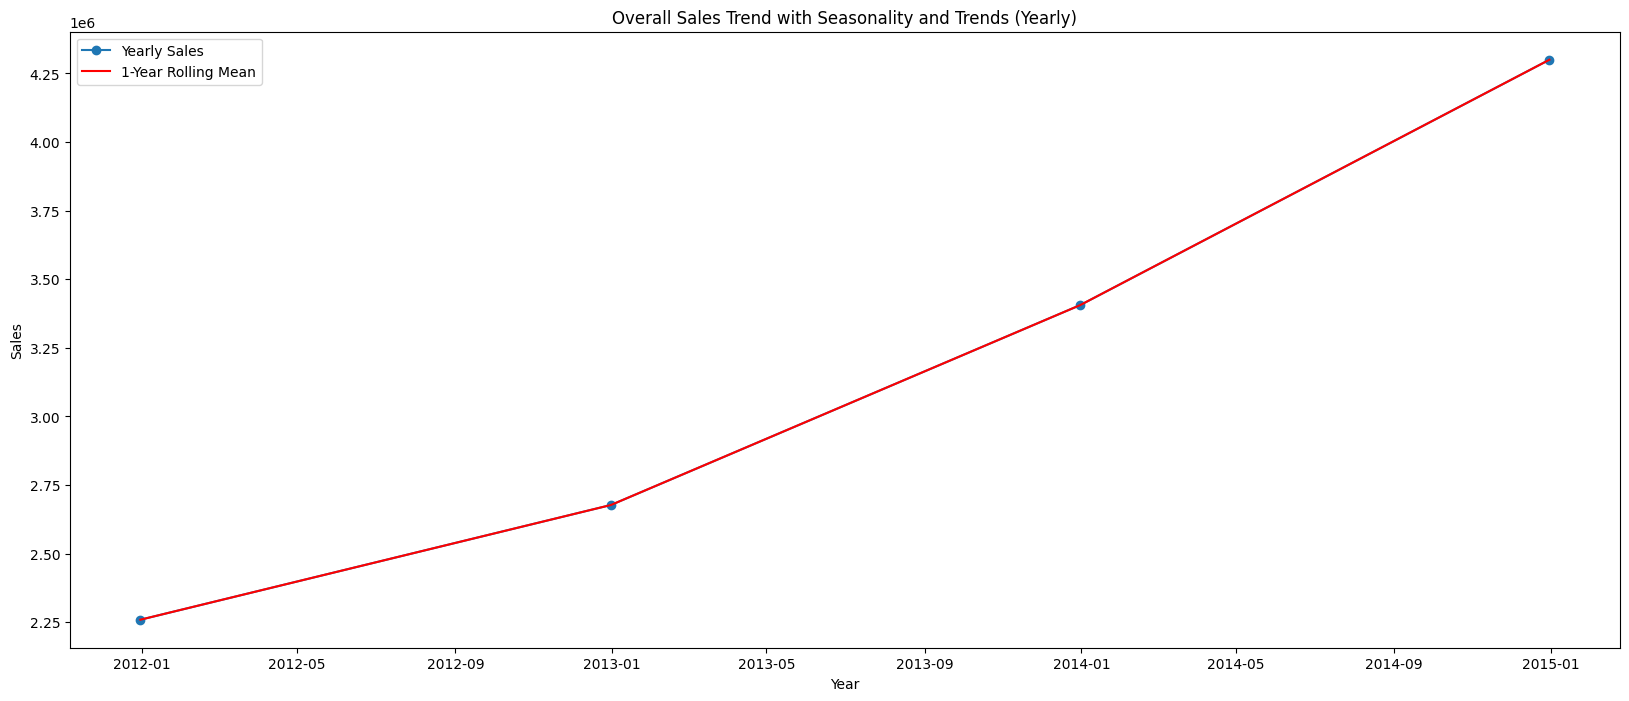

In [74]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
#Setting 'Order Date' as the index
df.set_index('Order Date', inplace=True)

#Aggregating sales by year
trend_yearly = df['Sales'].resample('Y').sum()

#Plotting the overall sales trend
plt.figure(figsize=(20, 8))
plt.plot(trend_yearly, label='Yearly Sales', marker='o')

#Applying a rolling mean to smooth the data
rolling_mean_yearly = trend_yearly.rolling(window=1, min_periods=1).mean()
plt.plot(rolling_mean_yearly, label='1-Year Rolling Mean', color='red')

#Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Overall Sales Trend with Seasonality and Trends (Yearly)')
plt.legend()
plt.show()

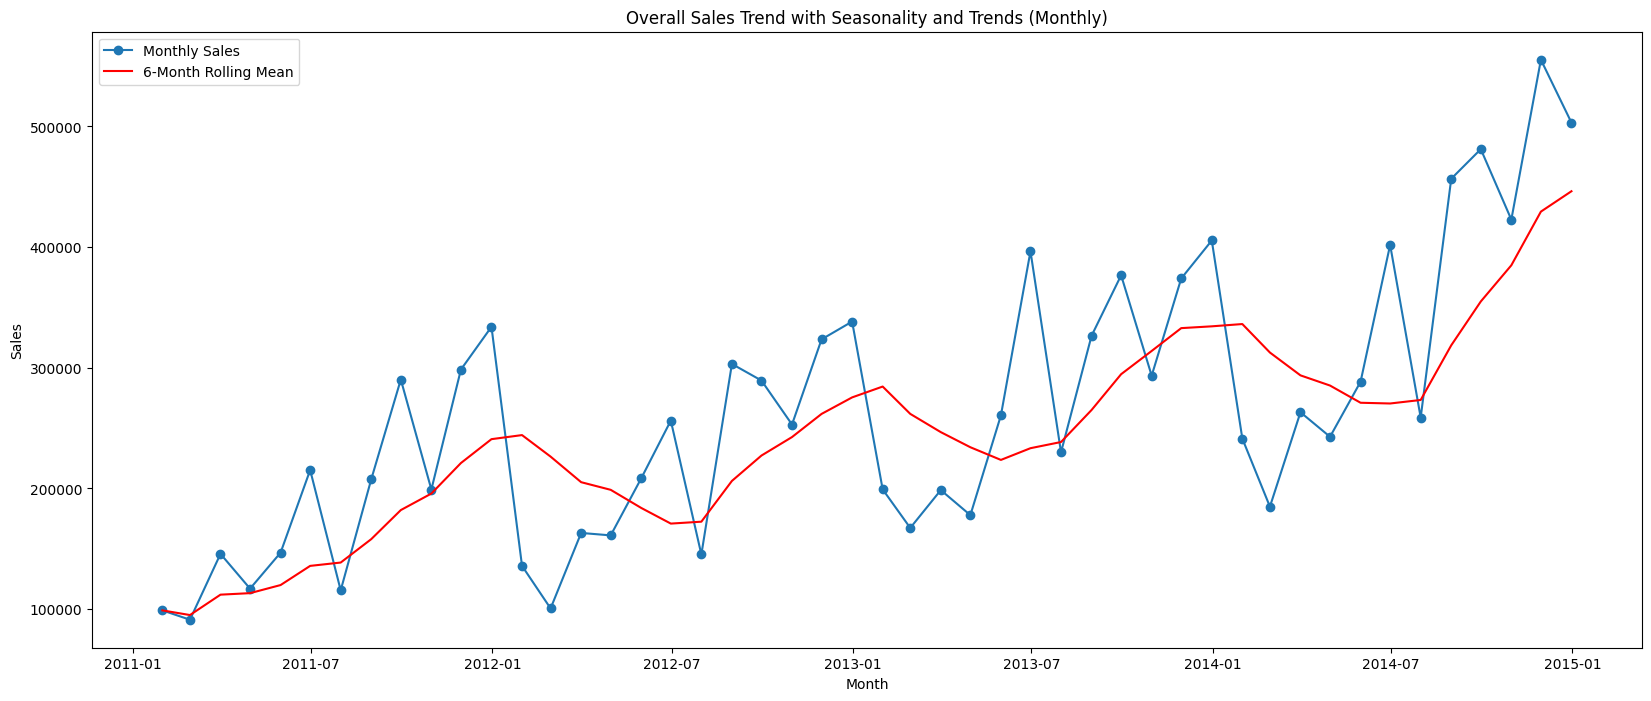

In [75]:
sales_trend_monthly = df['Sales'].resample('M').sum()
#Plotting the monthly sales trend
plt.figure(figsize=(20, 8))
plt.plot(sales_trend_monthly, label='Monthly Sales', marker='o')

#Apply a rolling mean to smooth the data
rolling_mean_monthly = sales_trend_monthly.rolling(window=6, min_periods=1).mean()
plt.plot(rolling_mean_monthly, label='6-Month Rolling Mean', color='red')

#Adding labels and title
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Overall Sales Trend with Seasonality and Trends (Monthly)')
plt.legend()
plt.show()